# Initialization

## Import of Libraries Needed

- import of libraries neede
- definition of global variables

In [2]:
import os
import sys
sys.path.append('../src')

from dotenv import find_dotenv, load_dotenv


In [3]:
# Load API_KEY
_ = load_dotenv(find_dotenv())
API_KEY  = os.getenv('DEPENDENCY_TRACK_API_KEY')

In [4]:
import warnings
import sys
sys.path.append('../src')

from dependency_track import DependencyTrack

# Deactivate warning from SSL certificates
warnings.filterwarnings('ignore') 

In [5]:
# Create DependencyTrack object
dt = DependencyTrack()

{'X-Api-Key': 'YwxYYhkXsFeCcUyuApME2Nbn8hK69FA3', 'accept': 'application/json'}


In [6]:
dt._get_all_projects()

url is: https://dependency-track.poc.roche.com/api/v1/project
{'headers': {'X-Api-Key': 'YwxYYhkXsFeCcUyuApME2Nbn8hK69FA3',
             'accept': 'application/json'}}
{'Name': ['x-test'],
 'UUID': ['76332a66-f26e-4a01-9340-dd4d14b06e6c'],
 'Version': []}
{'headers': {'X-Api-Key': 'YwxYYhkXsFeCcUyuApME2Nbn8hK69FA3',
             'accept': 'application/vnd.cyclonedx+xml'}}


Name  Version                                  UUID
0  x-test        1  76332a66-f26e-4a01-9340-dd4d14b06e6c

In [8]:
DEPENDENCY_TRACK_BASE_URL = "https://dependency-track.poc.roche.com"  
# Set API version
API_VERSION = "v1"  
# Set the API URL of your Dependency Track instance 
DEPENDENCY_TRACK_API_URL = f"{DEPENDENCY_TRACK_BASE_URL}/api/{API_VERSION}"

headers =  {                     
            "accept": "application/json",
            "X-Api-Key": os.getenv('DEPENDENCY_TRACK_API_KEY')
            }

url = f"{DEPENDENCY_TRACK_API_URL}/project"
dt._make_request(method='GET', url=url, verify=False, headers=headers)

{'headers': {'X-Api-Key': 'YwxYYhkXsFeCcUyuApME2Nbn8hK69FA3',
             'accept': 'application/json'}}


<Response [200]>

In [ ]:
class DependencyTrack:
    # Set Dependency Track instance base URL
    DEPENDENCY_TRACK_BASE_URL = "https://dependency-track.poc.roche.com"  
    # Set API version
    API_VERSION = "v1"  
    # Set the API URL of your Dependency Track instance 
    DEPENDENCY_TRACK_API_URL = f"{DEPENDENCY_TRACK_BASE_URL}/api/{API_VERSION}"


    def _make_request(method, url, verify=True, **kwargs):
        try:
            session = requests.Session()
            response = session.request(method=method, url=url, verify=verify, **kwargs)
            response.raise_for_status()  # Raises an HTTPError for non-2xx responses
            return response
        except requests.exceptions.RequestException as e:
            print(f"An error occurred while making the request:{e}")
            return None

In [3]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv(raise_error_if_not_found=True, usecwd=False))
headers =  {                     
            "accept": "application/json",
            "X-Api-Key": os.getenv('DEPENDENCY_TRACK_API_KEY')
        }      

In [12]:
def make_request(method, url, verify=True, **kwargs):
    try:
        session = requests.Session()
        response = session.request(method=method, url=url, verify=verify, **kwargs)
        response.raise_for_status()  # Raises an HTTPError for non-2xx responses
        return response
    except requests.exceptions.RequestException as e:
        print(f"An error occurred while making the request:{e}")
        return None





In [17]:
# Make the request to get all projects
method = 'GET'
url = f"{DEPENDENCY_TRACK_API_URL}/project"
response = make_request(method='GET', url=url, verify=False, headers=headers)

In [18]:
response.status_code

200

In [15]:
DEPENDENCY_TRACK_API_URL

'https://dependency-track.poc.roche.com/api/v1'

In [6]:
import requests

# Set Dependency Track instance base URL
DEPENDENCY_TRACK_BASE_URL = "https://dependency-track.poc.roche.com"  
# Set API version
API_VERSION = "v1"  
# Set the API URL of your Dependency Track instance
DEPENDENCY_TRACK_API_URL = f"{DEPENDENCY_TRACK_BASE_URL}/api/{API_VERSION}"


# Set the headers with the API key
api_key = 'YwxYYhkXsFeCcUyuApME2Nbn8hK69FA3'
headers = {
    "accept": "application/json",
    "X-Api-Key": api_key
}
    
# Make the request to get all projects
base_url = DEPENDENCY_TRACK_API_URL
projects_endpoint = f"{base_url}/project"
response = requests.get(
    projects_endpoint,
    headers=headers,
    verify=False
)

In [7]:
response.status_code

200

In [ ]:
class DependencyTrack:
    def __init__(self):
        self.project_info = None
        # Load API_KEY
        load_dotenv(find_dotenv(raise_error_if_not_found=True, usecwd=False))

        # Set the headers with the API key
        self.headers =  {                     
            "accept": "application/json",
            "X-Api-Key": os.getenv('DEPENDENCY_TRACK_API_KEY')
        }      
        pprint(self.headers)

        self._get_all_projects()
        if self.project_info is None:
            print("Initialization failed: Project information not available")


    def _get_all_projects(self):
        # Code to retrieve project names and UUIDs
        # Store the data in self.projects attribute
        
        # Make the request to get all projects
        url = f"{DEPENDENCY_TRACK_API_URL}/project"
        response = _make_request(method='GET', 
                                 url=url, 
                                 verify=False, 
                                 headers=self.headers)

        # Check the response status
        if response is not None and response.status_code == SUCCESS_STATUS_CODE:
            projects = response.json()
            data = {
                "Name": [],
                "Version": [],
                "UUID": []
            }
            for project in projects:
                project_name = project["name"]
                project_uuid = project["uuid"]

            data["Name"].append(project_name)
            data["UUID"].append(project_uuid)

            # Make the request to get versions for a project
            url = f"{DEPENDENCY_TRACK_API_URL}/bom/cyclonedx/project/{project_uuid}"  
            response = _make_request(method='GET', 
                                     url=url, 
                                     verify=False, 
                                     headers=self.headers)

            # Check the response status
            if response.status_code == SUCCESS_STATUS_CODE:
                project_info = response.json()
                if "version" in project_info :
                    data['Version'].append(project_info['version'])
                else:
                    data['Version'].append(pd.NA)      
            else:
                data['Version'].append(pd.NA)
                logging.error("Failed to get project version.")

            # Create the dataframe
            project_info = pd.DataFrame(data)
            return pd.DataFrame(data)
        else:
            logging.error("Failed to get projects.")
            return None


    def _make_request(method, url, verify=True, **kwargs):
        try:
            session = requests.Session()
            response = session.request(method=method, url=url, verify=verify, **kwargs)
            response.raise_for_status()  # Raises an HTTPError for non-2xx responses
            return response
        except requests.exceptions.RequestException as e:
            print(f"An error occurred while making the request:{e}")
            return None

## Assumptions 
- The Dependency-Track API key has been added to the `.env` file with the name `DEPENDENCY_TRACK_API_KEY`.
- The notebook needs to be **connected to Roche VPN** to access Dependency-Track and Defect Dojo`

- For **WSL2** users, `wsl-vpnkit` needs to be installed and started from PowerShell using the following command:

```bash
wsl.exe -d wsl-vpnkit --cd /app wsl-vpnkit
```

# Load SBOM Data

## Load Project Info

- load projects
- remove projects that are not in scope (list `out_of_scope`)
- save project info in csv file for later use in file `project_data.csv`


**Projeec in scope**:- 

- Floodlight
- Generator_2
- iEdgeMicroService
- Juice_Shop
- NMP
- pm-dashboard-frontend
- pm-lst-kpi-module
- pm-mongo
- RDCS_RDCP-Client
- RT-Cosmo
- vul_flask_app
- WebGoat

In [9]:
# List of projects in scope
in_scope = ['Floodlight',
            'Generator_2',
            'iEdgeMicroService',
            'Juice_Shop',
            'NMP',
            'pm-dashboard-frontend',
            'pm-lst-kpi-module',
            'pm-mongo',
            'RDCS_RDCP-Client',
            'RT-Cosmo',
            'vul_flask_app',
            'WebGoat'
           ]

In [10]:
dt.get_all_projects()

ConnectionError: HTTPSConnectionPool(host='dependency-track.poc.roche.com', port=443): Max retries exceeded with url: /api/v1/project (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f3a450922d0>: Failed to establish a new connection: [Errno -2] Name or service not known'))

## Analyze SBOM Data for using different data fields

- Load data
- Analyze names
- Analyze versions
- Analyze other data fields

**Preconditions**
- Libraries imported
- Global variables defined
- projects_df available (execute `projects_df = pd.read_csv('project_data.csv')` if needed)

The following data fields are evaluated: <br>
-  `name` 
-  `p_name` 
-  `name` + `version`
-  `p_name` + `p_version`
-  hybrid `name`|`p_name` + `version`|`p_version`

### SBOM comparison based on 'name' field

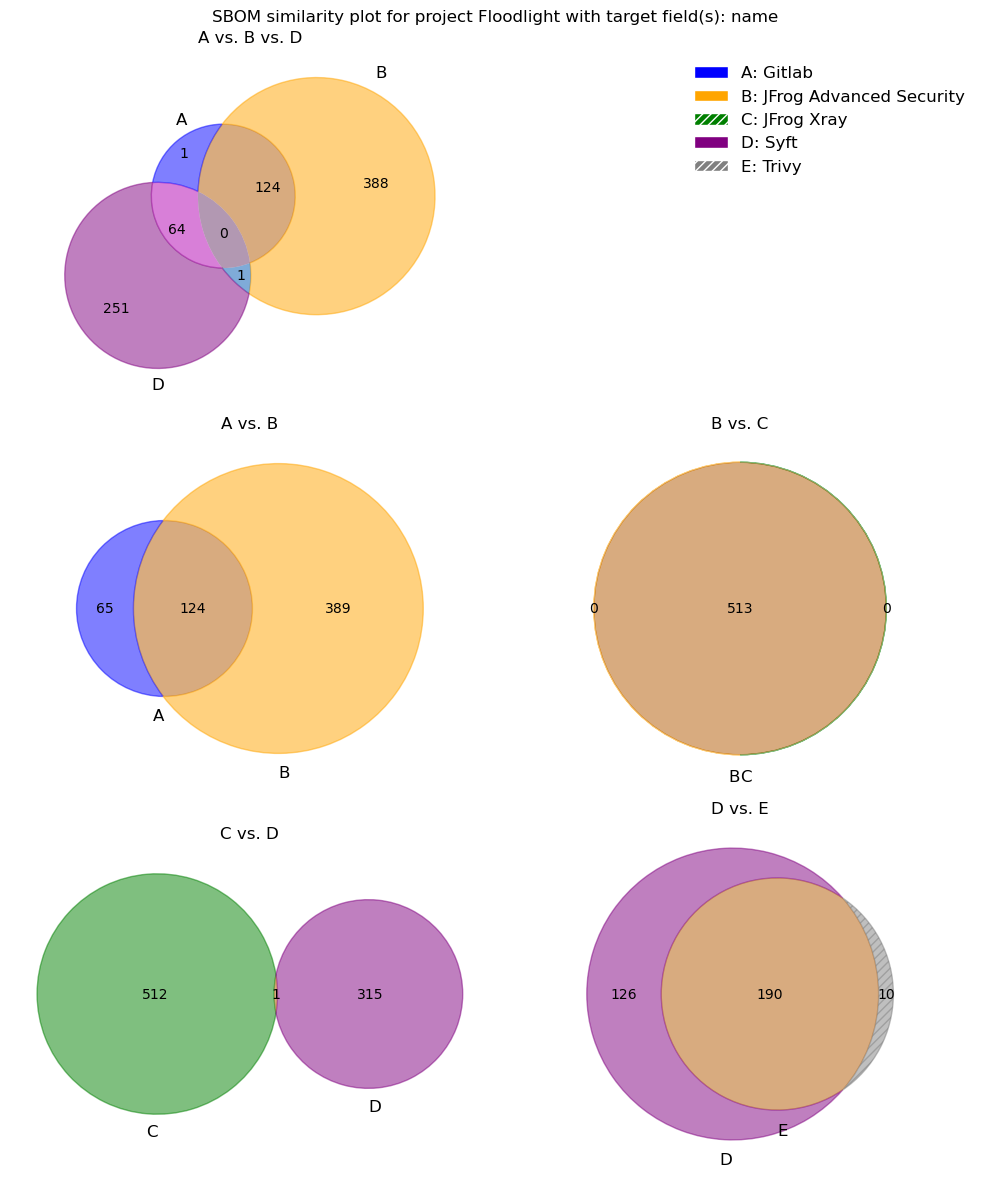

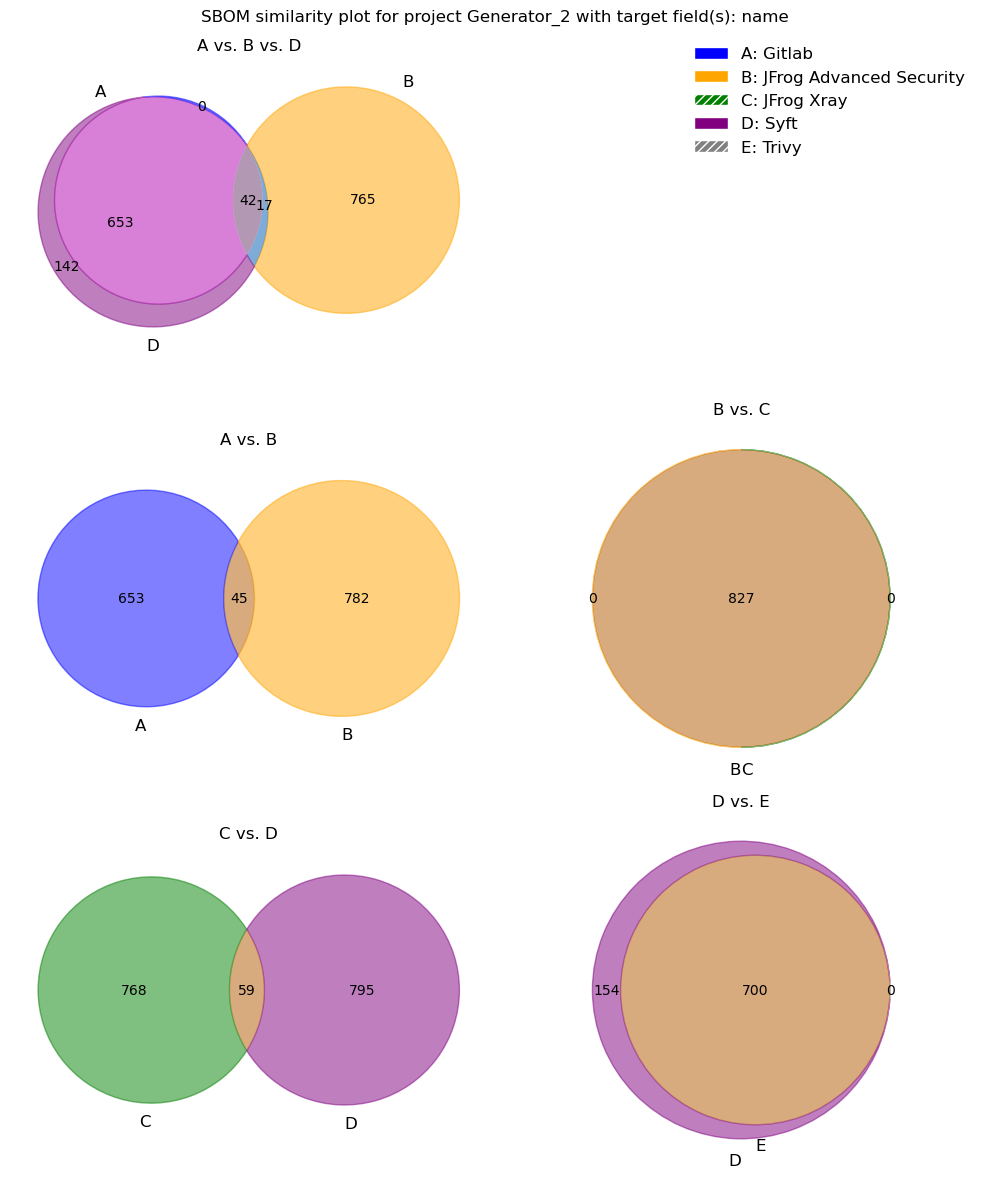

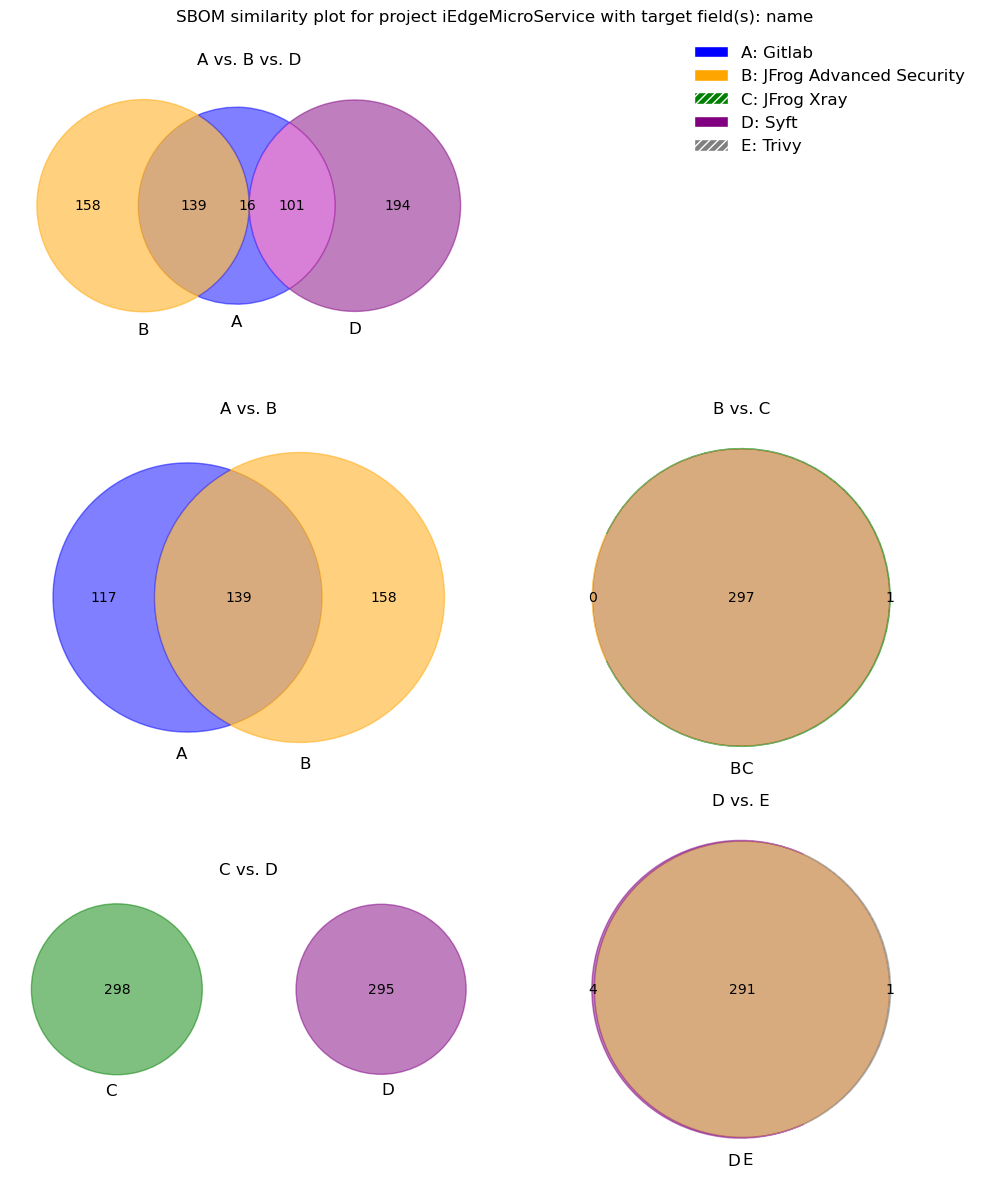

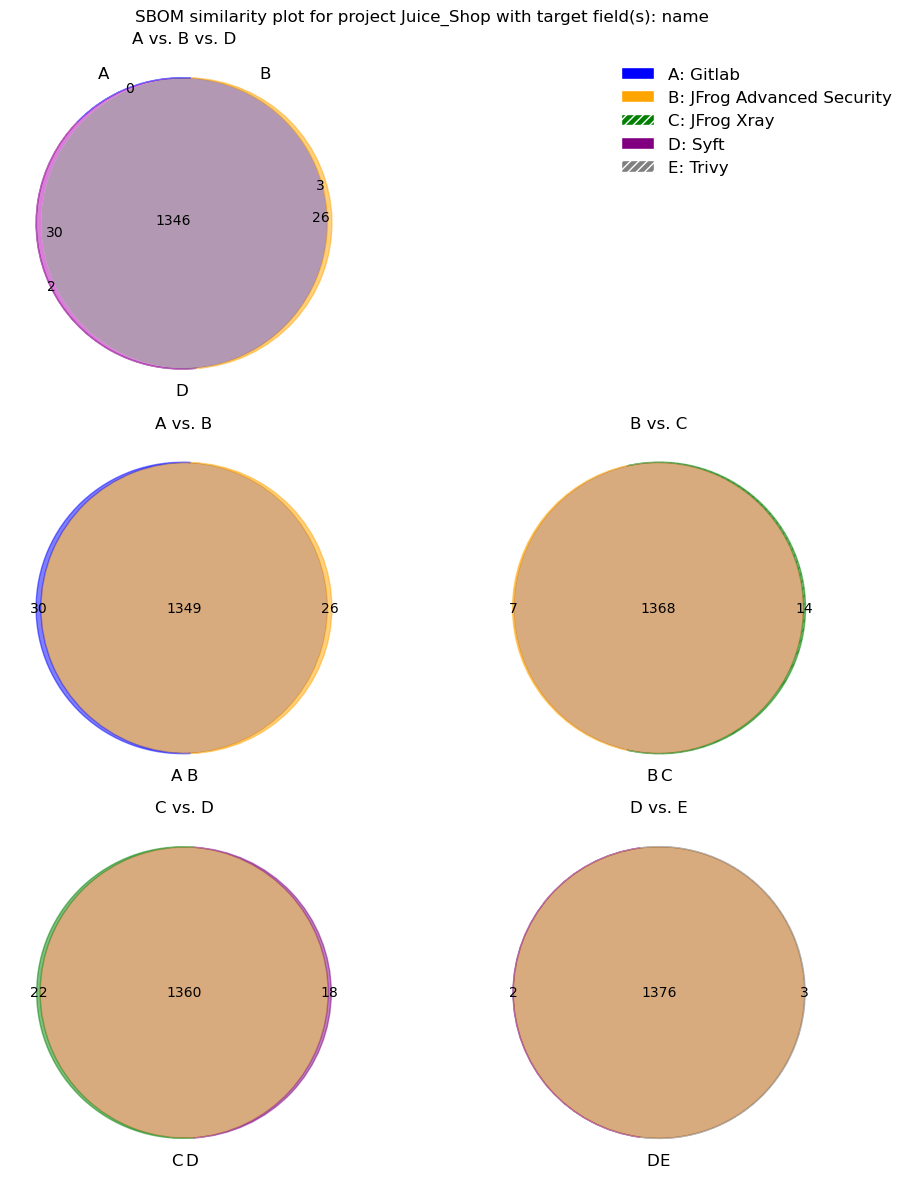

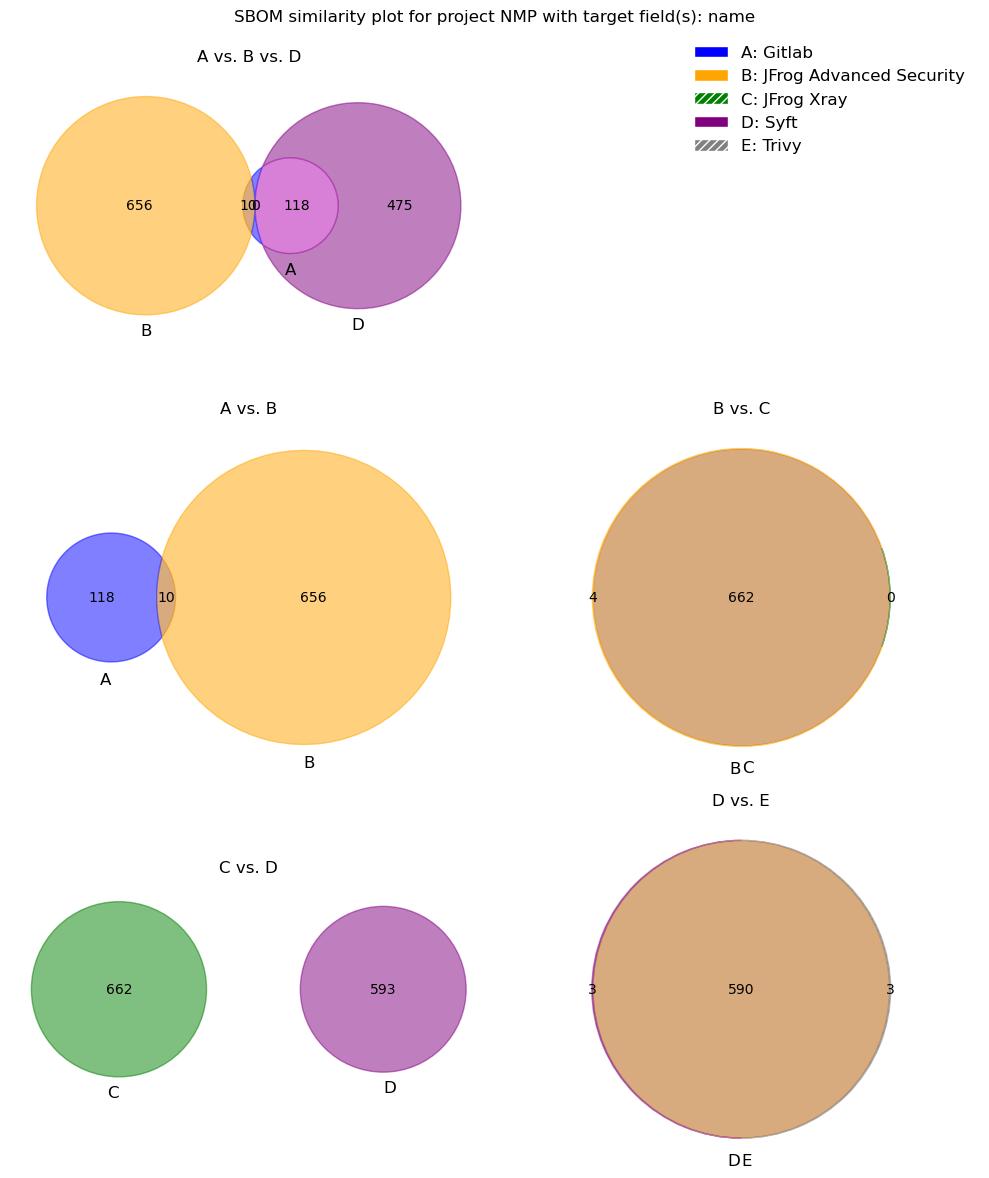

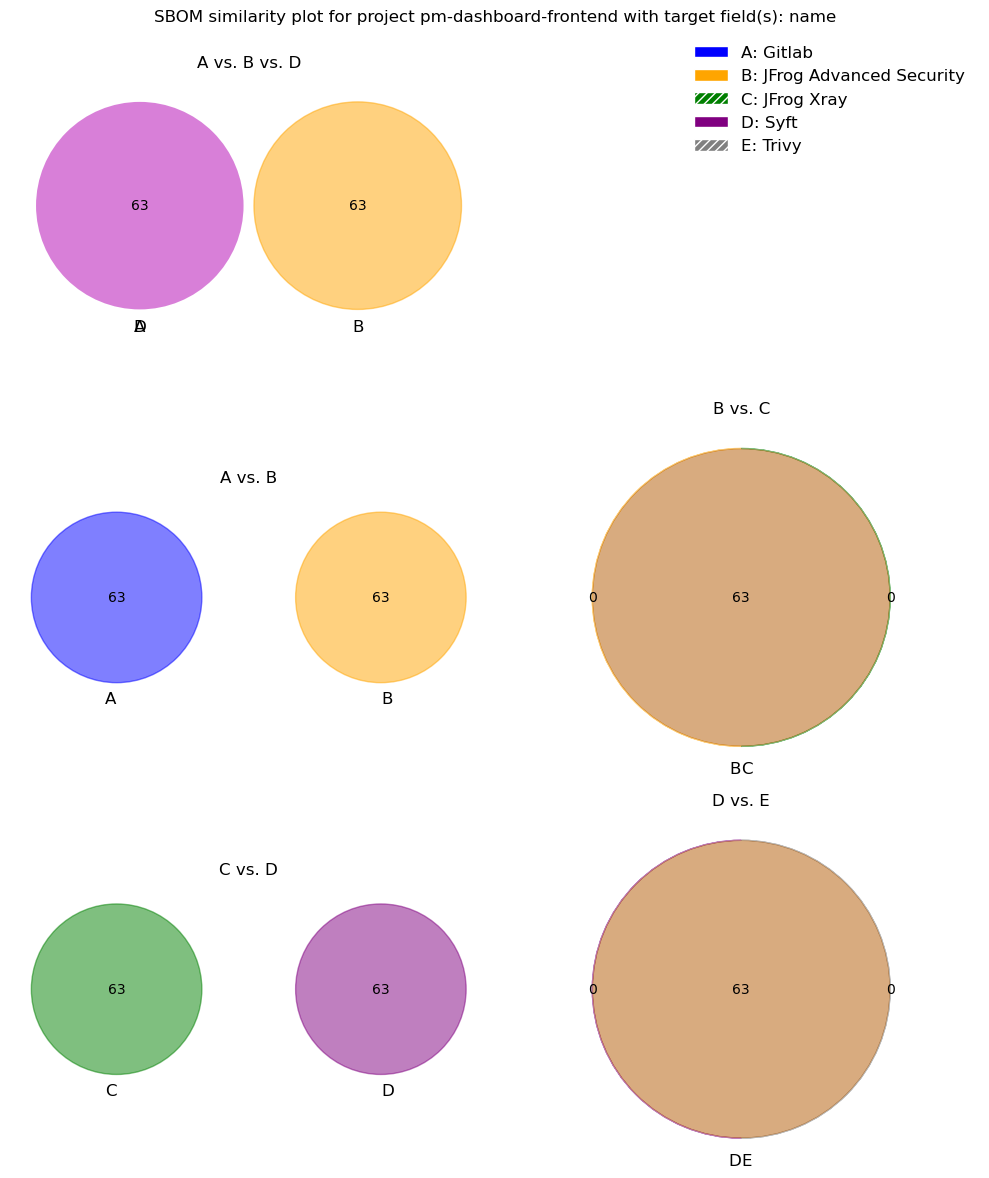

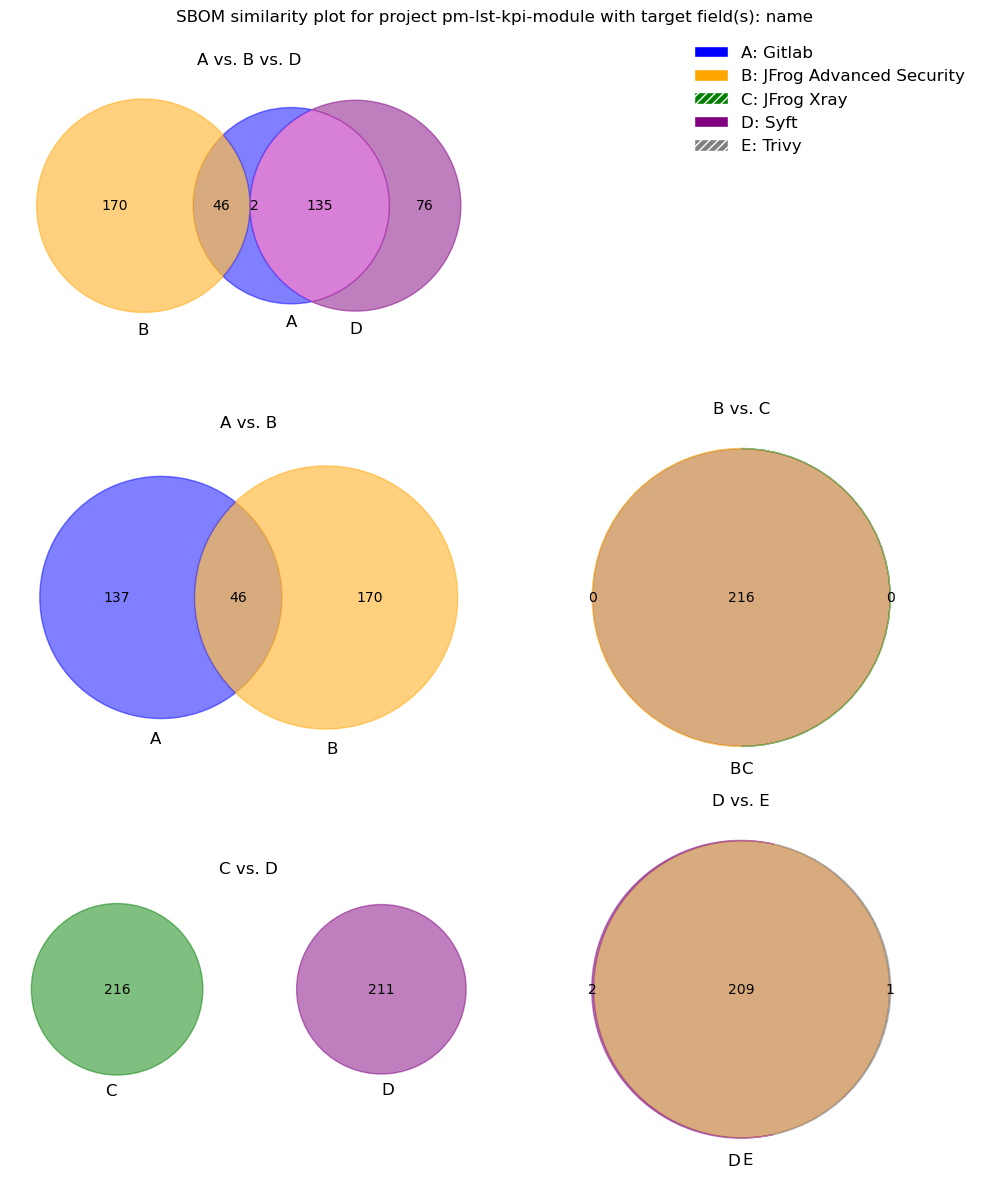

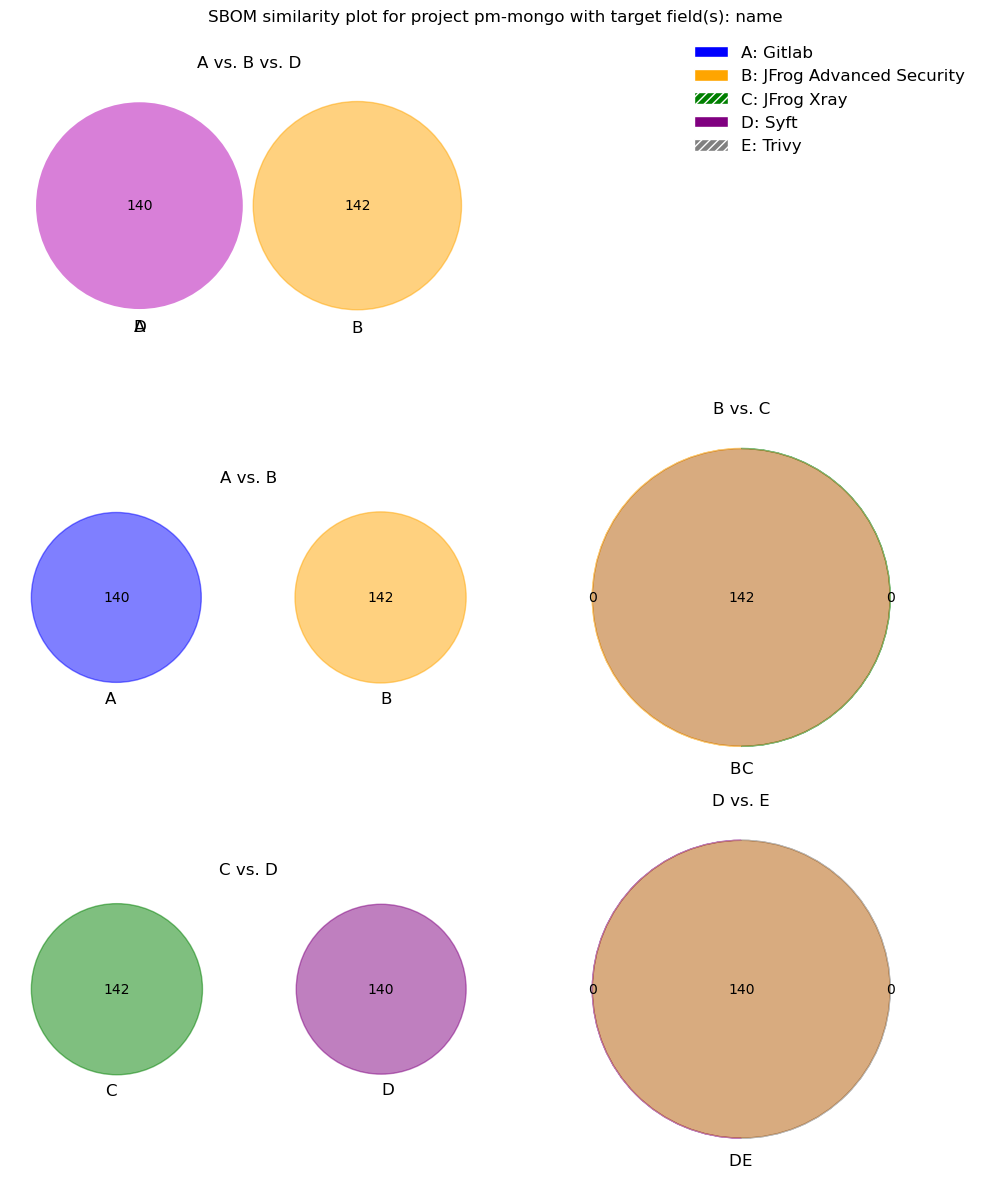

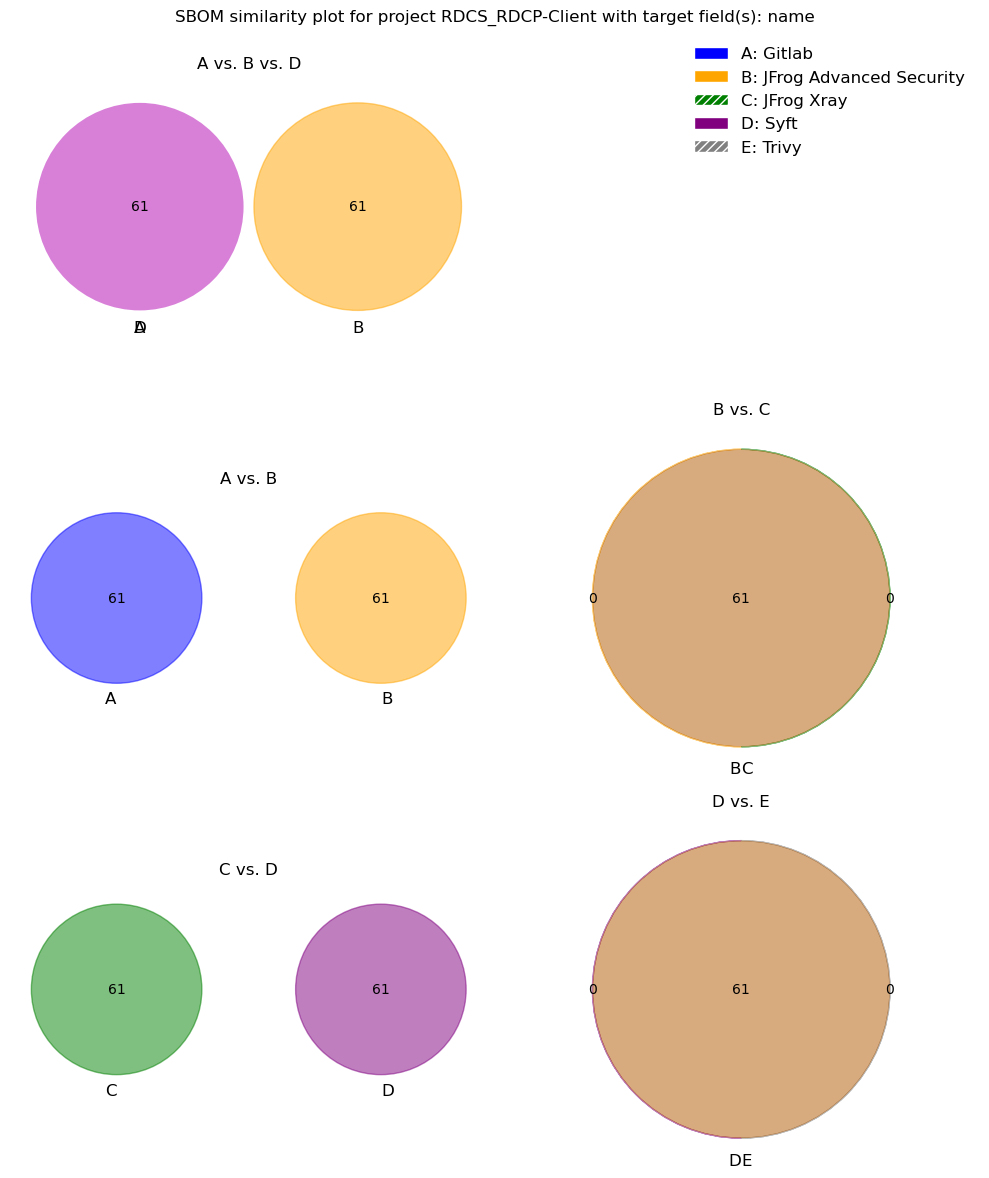

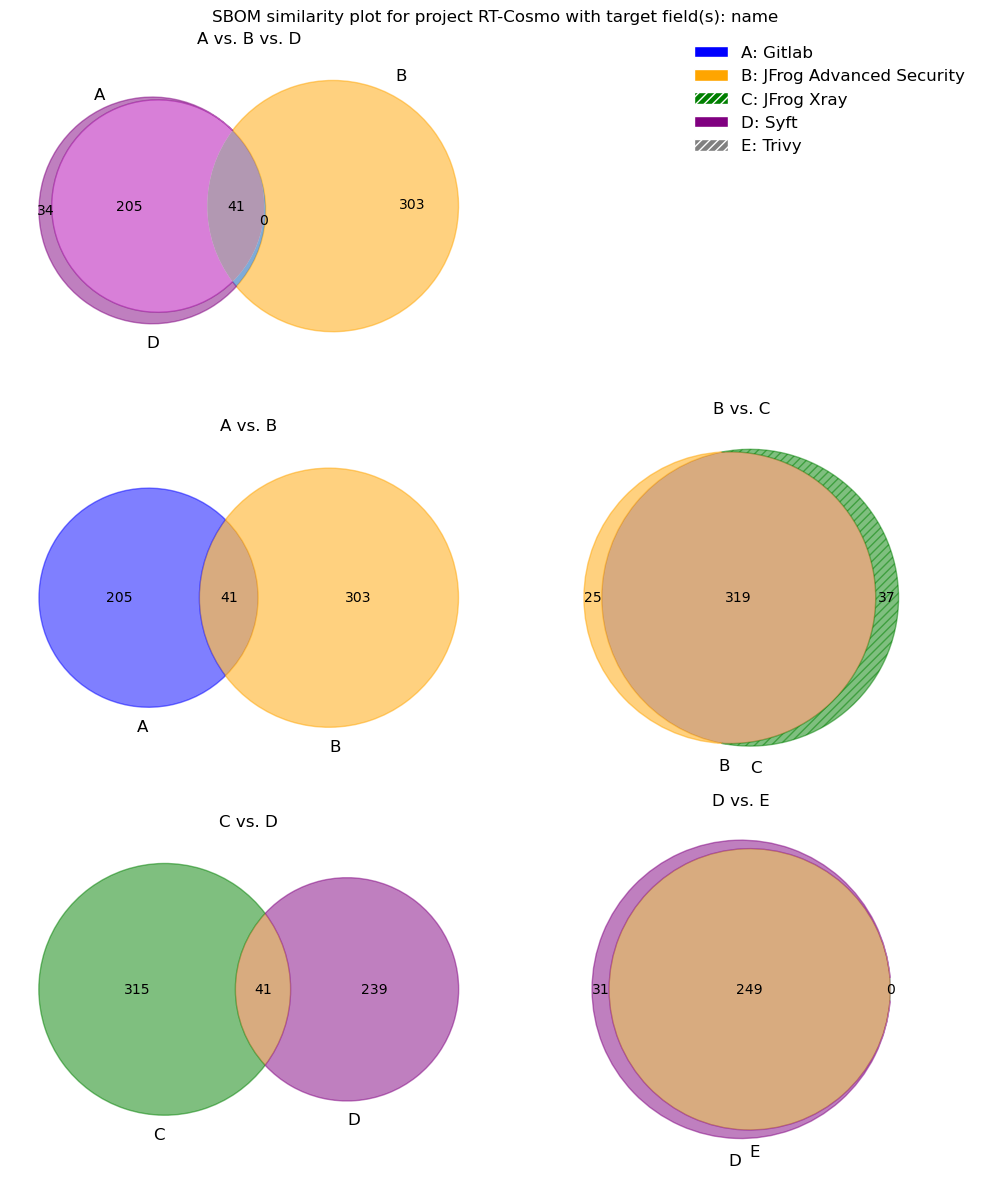

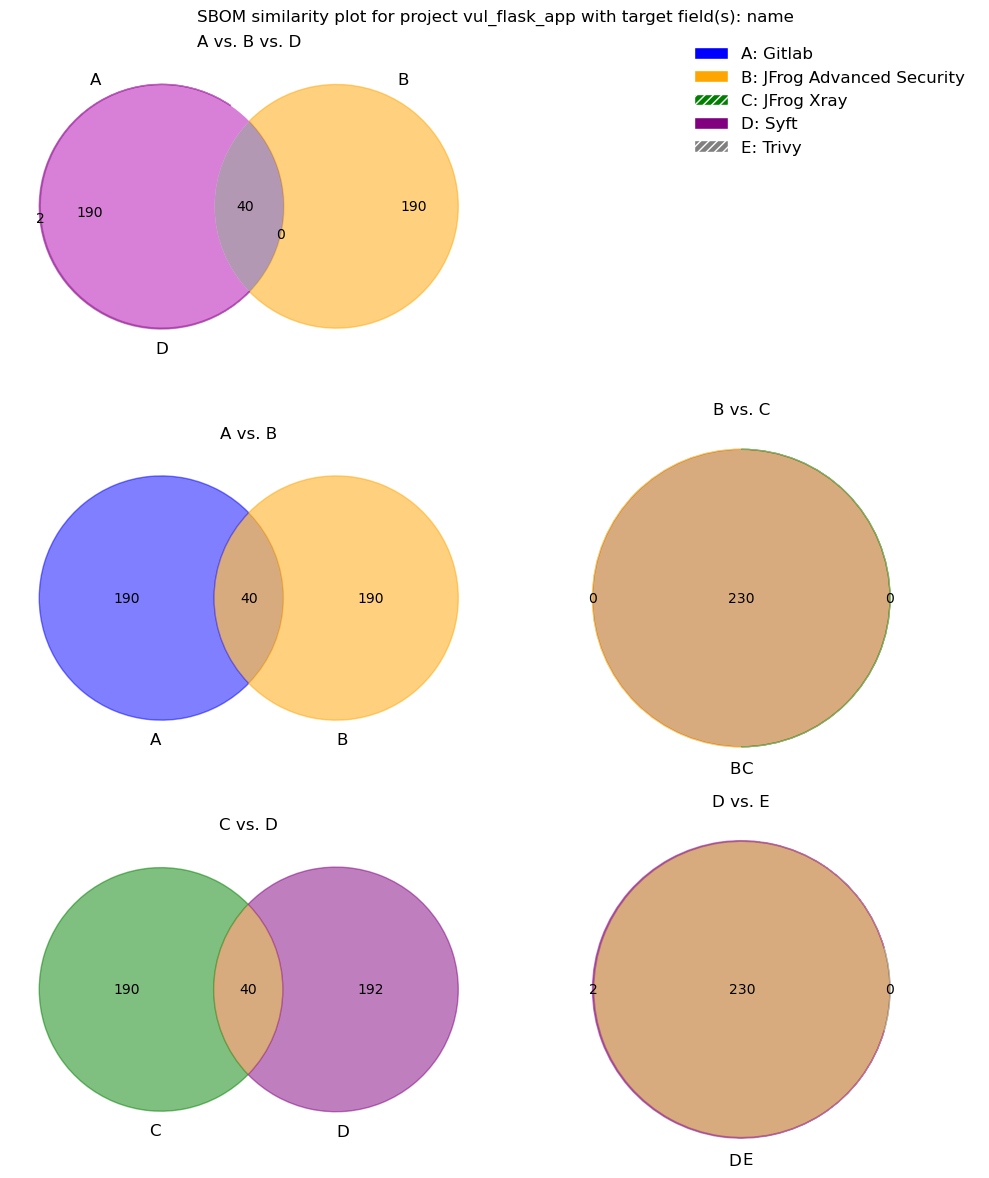

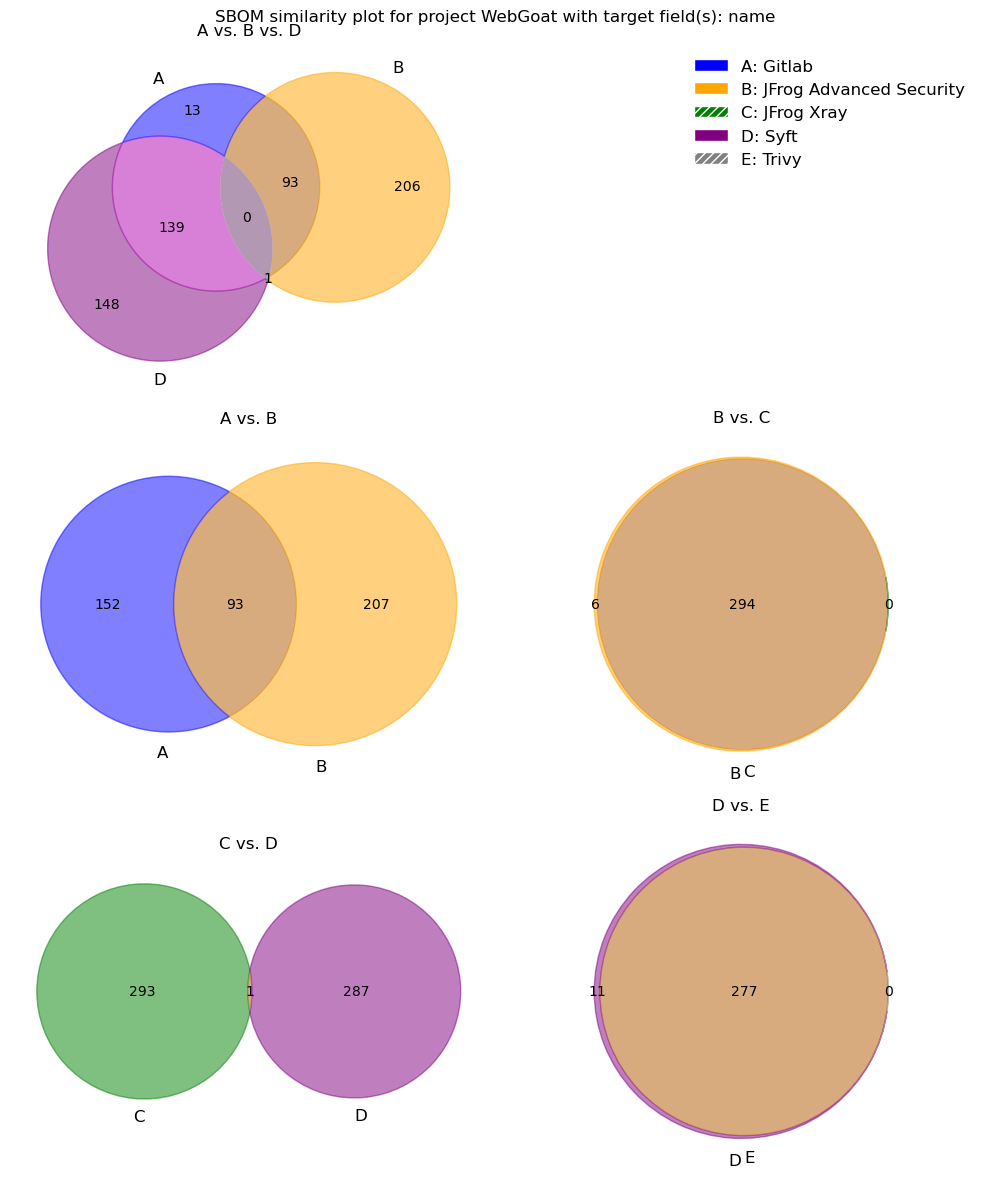

In [238]:
# define project name and target field 
project_name = in_scope[0]
target_fields = 'name'

for project_name in in_scope:
    # get project data in data frame
    project_scanner_data = collect_all_scanner_data_of_project(project_name)

    # visualize project scanner data
    target_output_file = f"SBOM_comparison_{project_name}_{target_fields}"
    create_SBOM_similarity_plot(project_name, target_fields, project_scanner_data, target_output_file)

#### Debug SBOM comparison analysis

In [24]:
projects_df['Name']
project_name = in_scope[0]

In [25]:
[f"{project_name}_{scanner_name}" for scanner_name in scanner_names]

['Floodlight_gitlab_cont',
 'Floodlight_jfrog_advanced_security_cont',
 'Floodlight_jfrog_cont',
 'Floodlight_syft_cont',
 'Floodlight_trivy_cont']

In [22]:
scanner_names = ['gitlab_cont', 'jfrog_advanced_security_cont', 'jfrog_cont', 'syft_cont', 'trivy_cont']

In [ ]:
matching_rows = projects_df[projects_df['Name'].isin([f"{project_name}_{scanner_name}" for scanner_name in scanner_names])]
uuids = matching_rows['UUID'].tolist()

In [26]:
DT_project_list = [f"{project_name}_{scanner_name}" for scanner_name in scanner_names]
matching_rows = projects_df[projects_df['Name'].isin(DT_project_list)]

In [31]:
matching_rows['UUID'].to_list()

['7ecb1271-7b7a-428b-aa85-9d7695d74654',
 '7f05c871-c4b1-4171-bb6e-361d17246ca4',
 '1fc23e96-bef8-4d07-b45f-9348f5a22e9a',
 'a969a2e1-7fa5-44e6-802e-af571745a275',
 'e14e020d-0d86-407a-8c07-23aea9646d93']

### SBOM comparison based on 'p_name' field

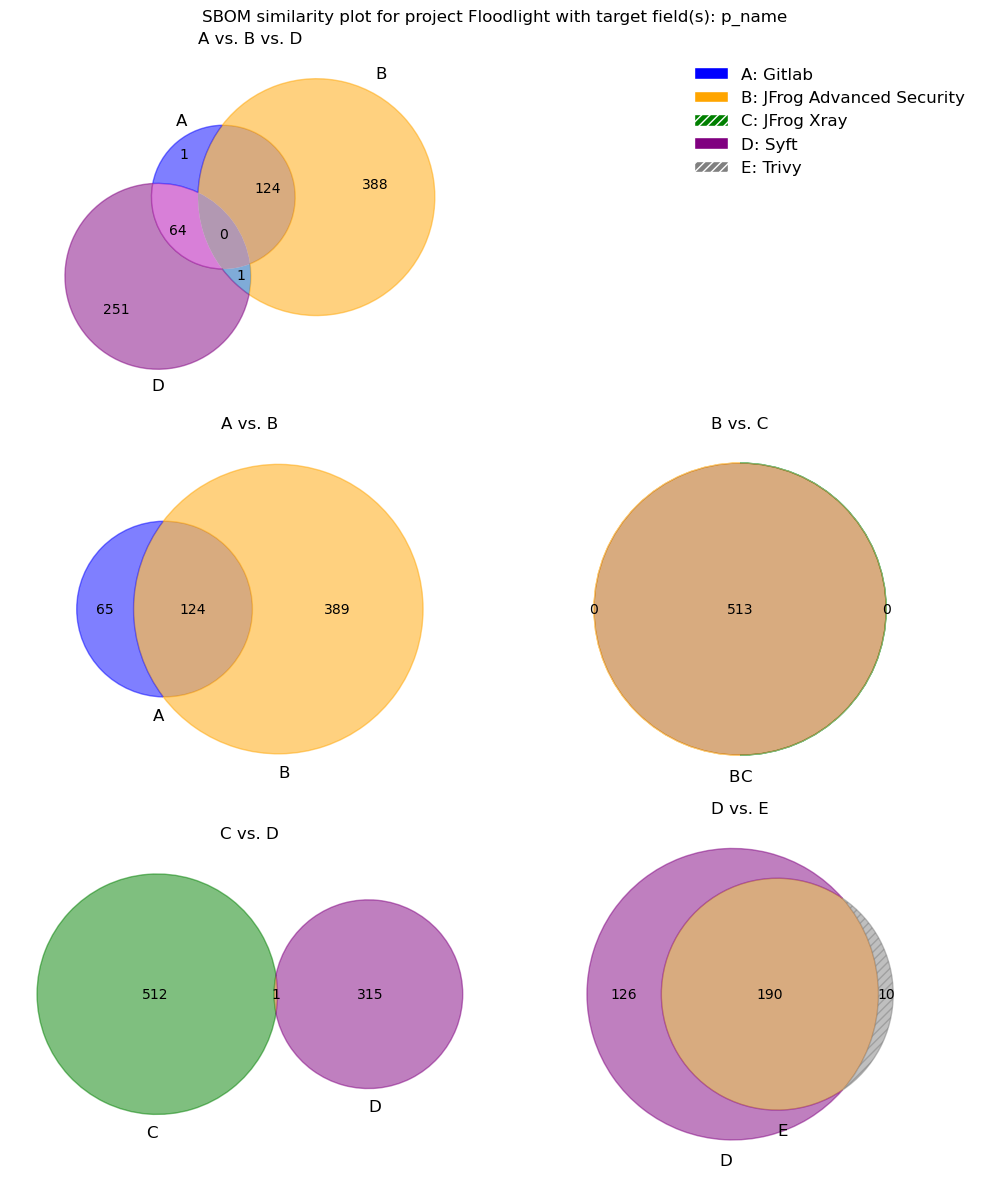

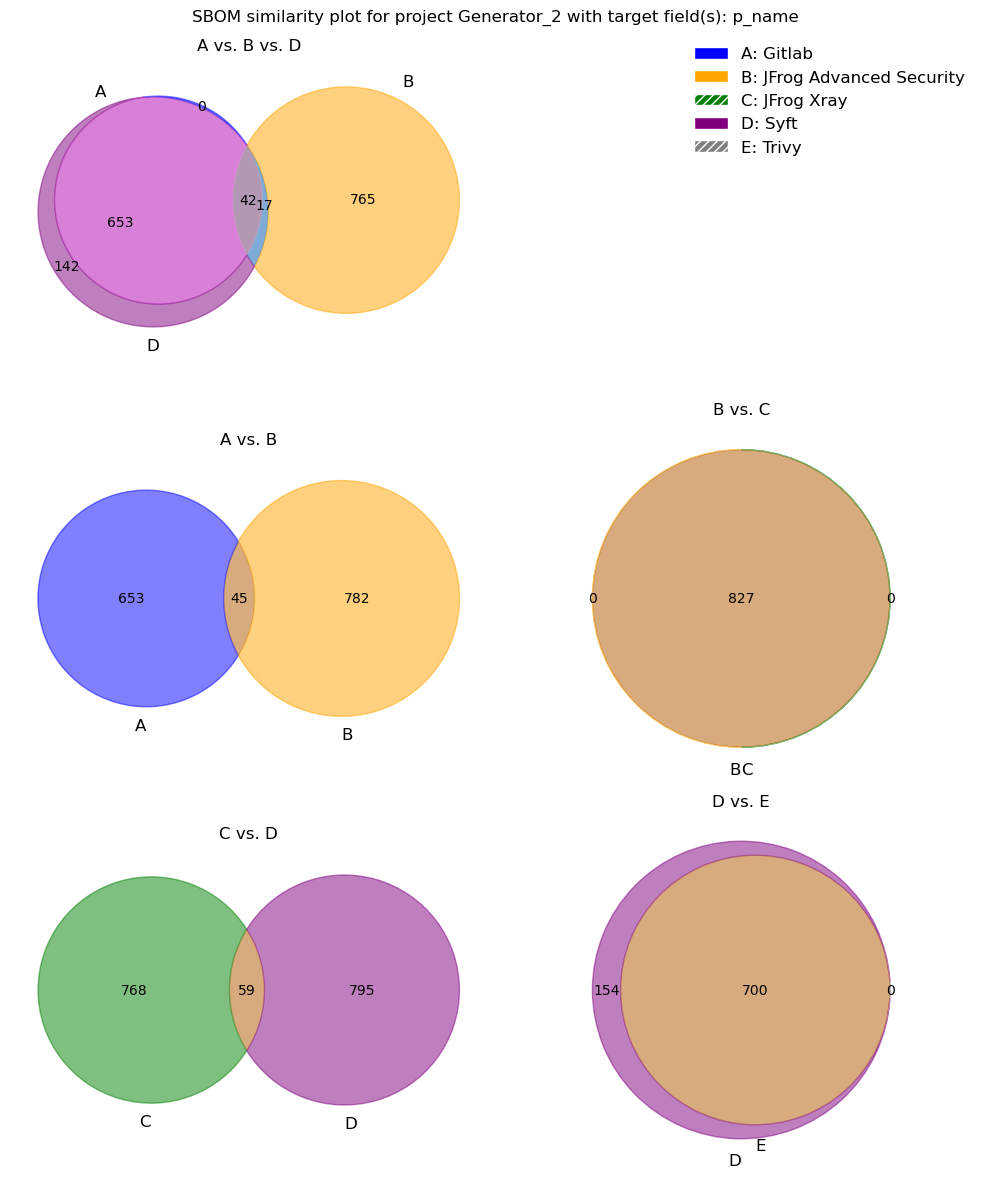

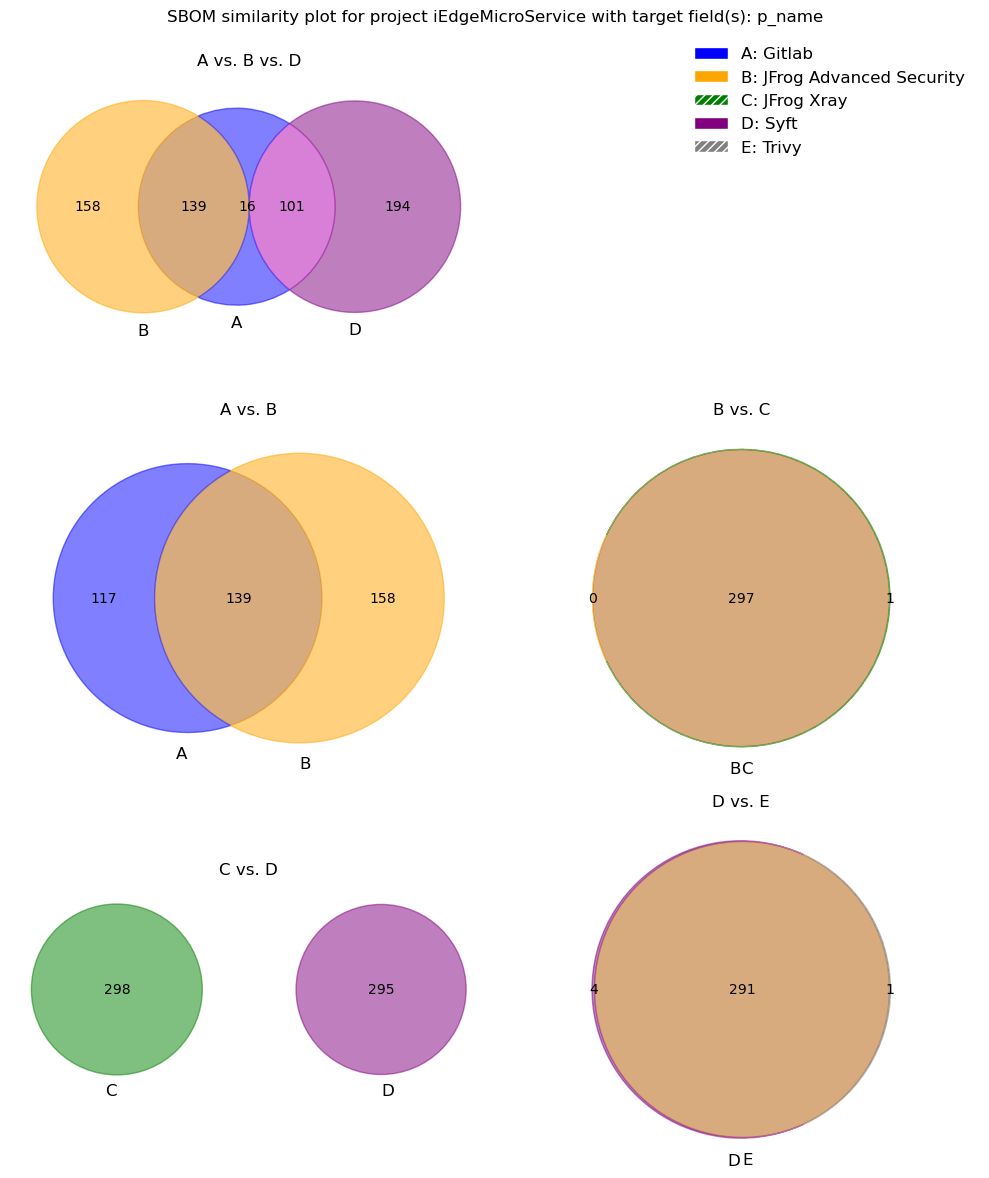

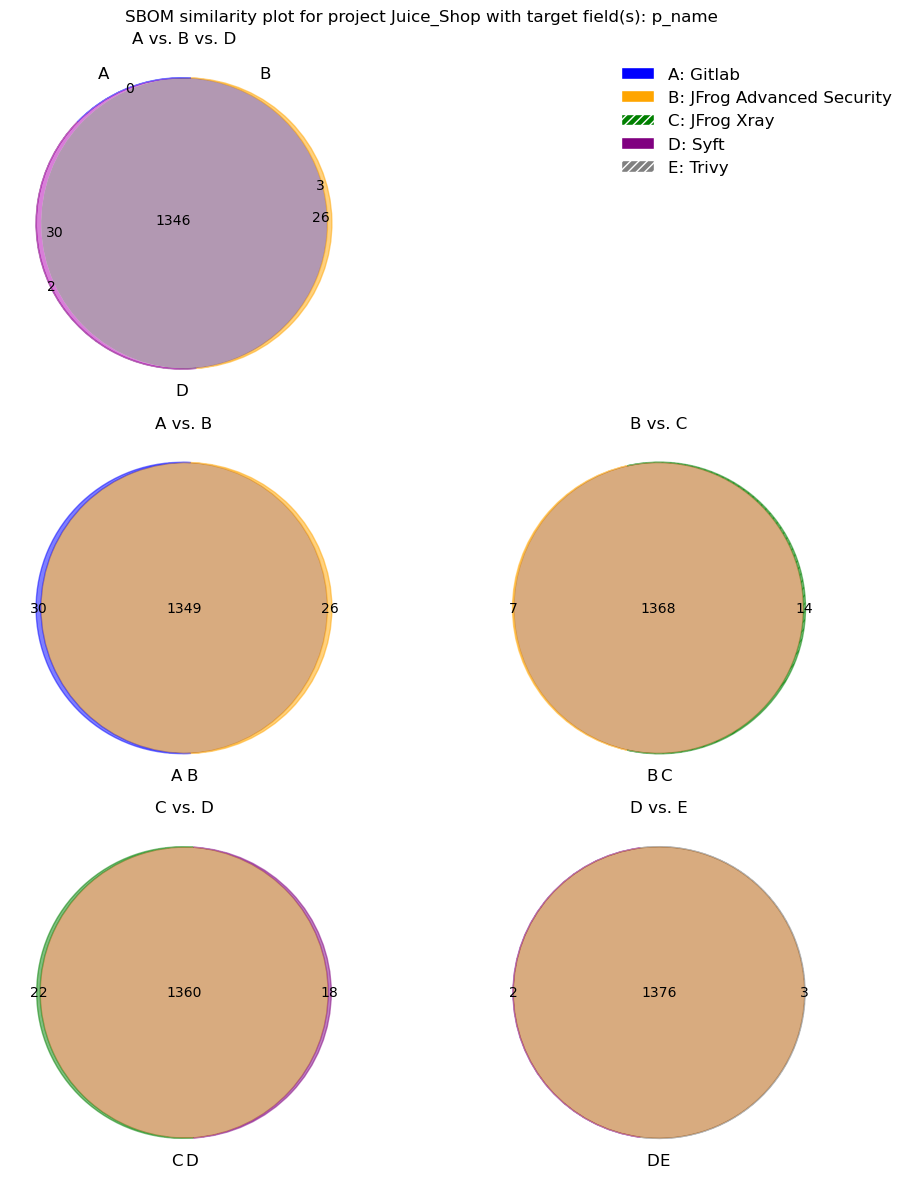

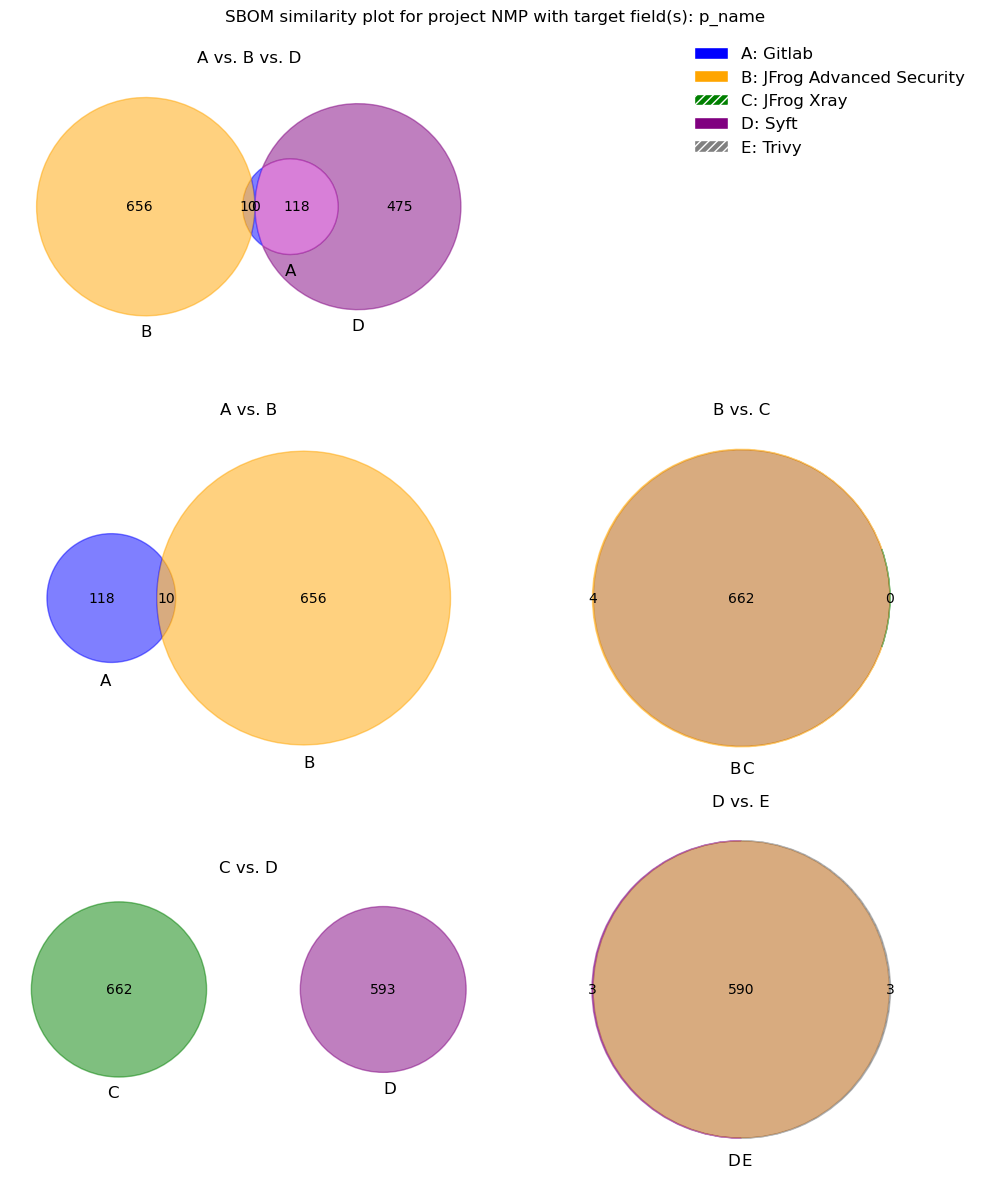

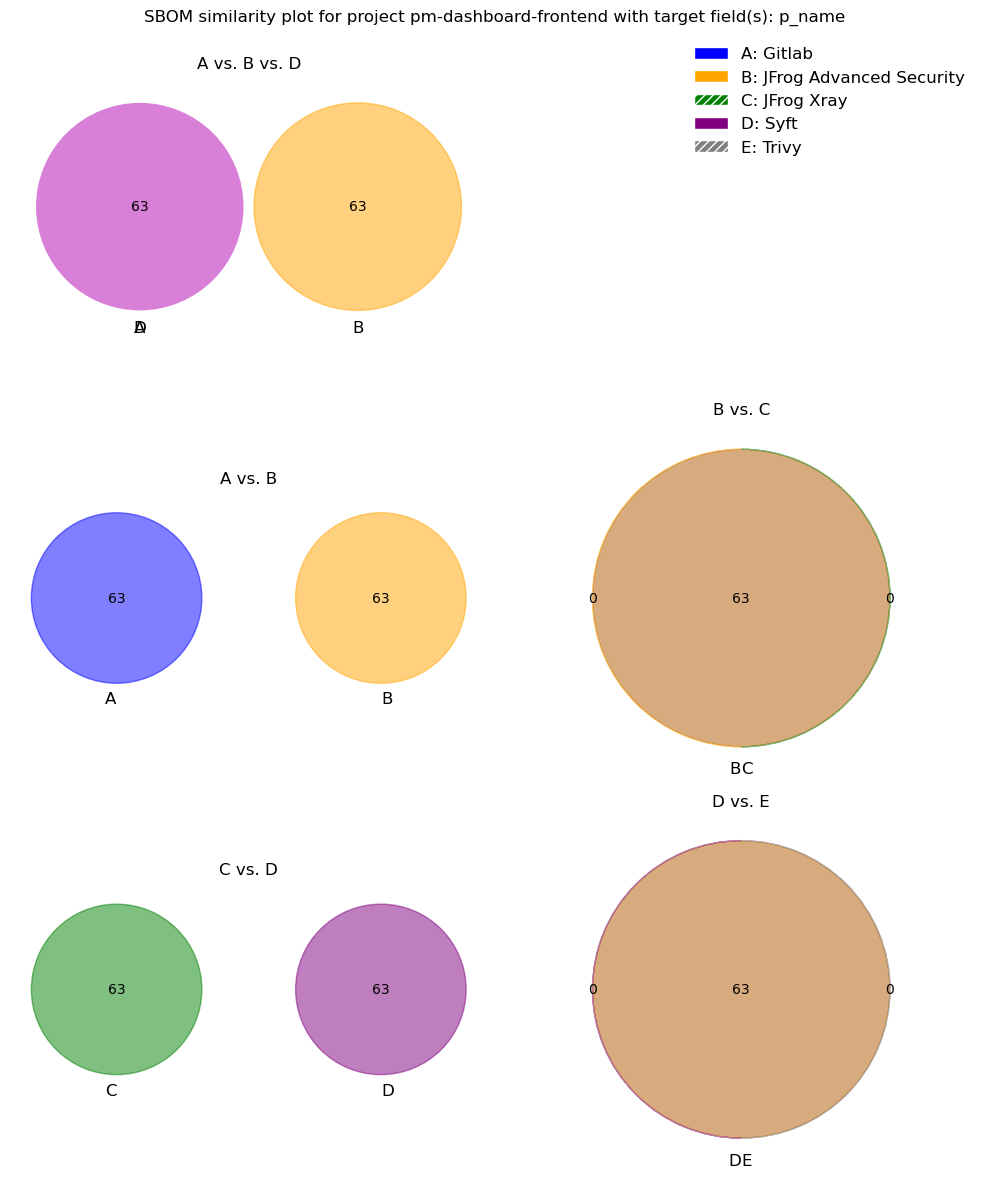

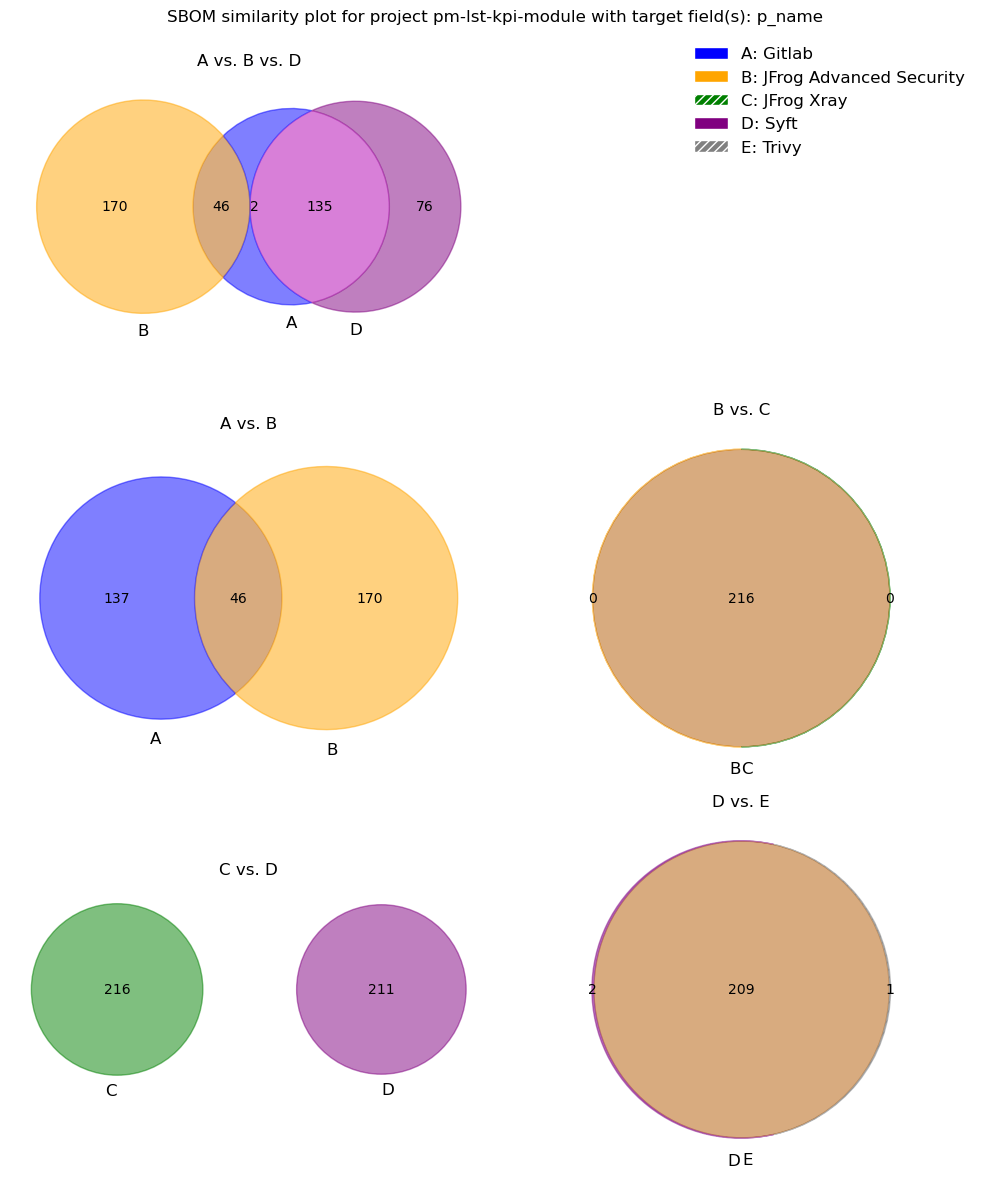

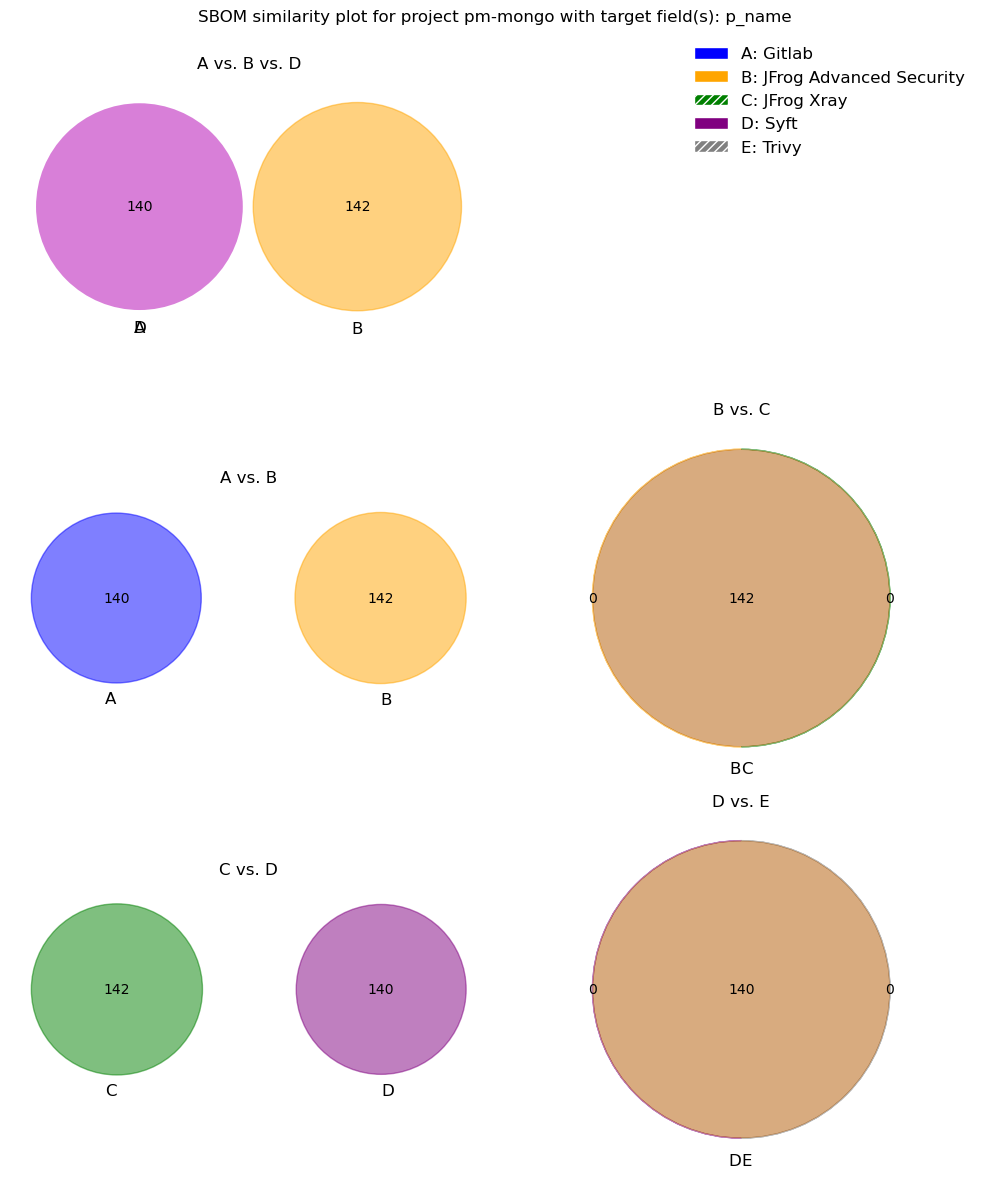

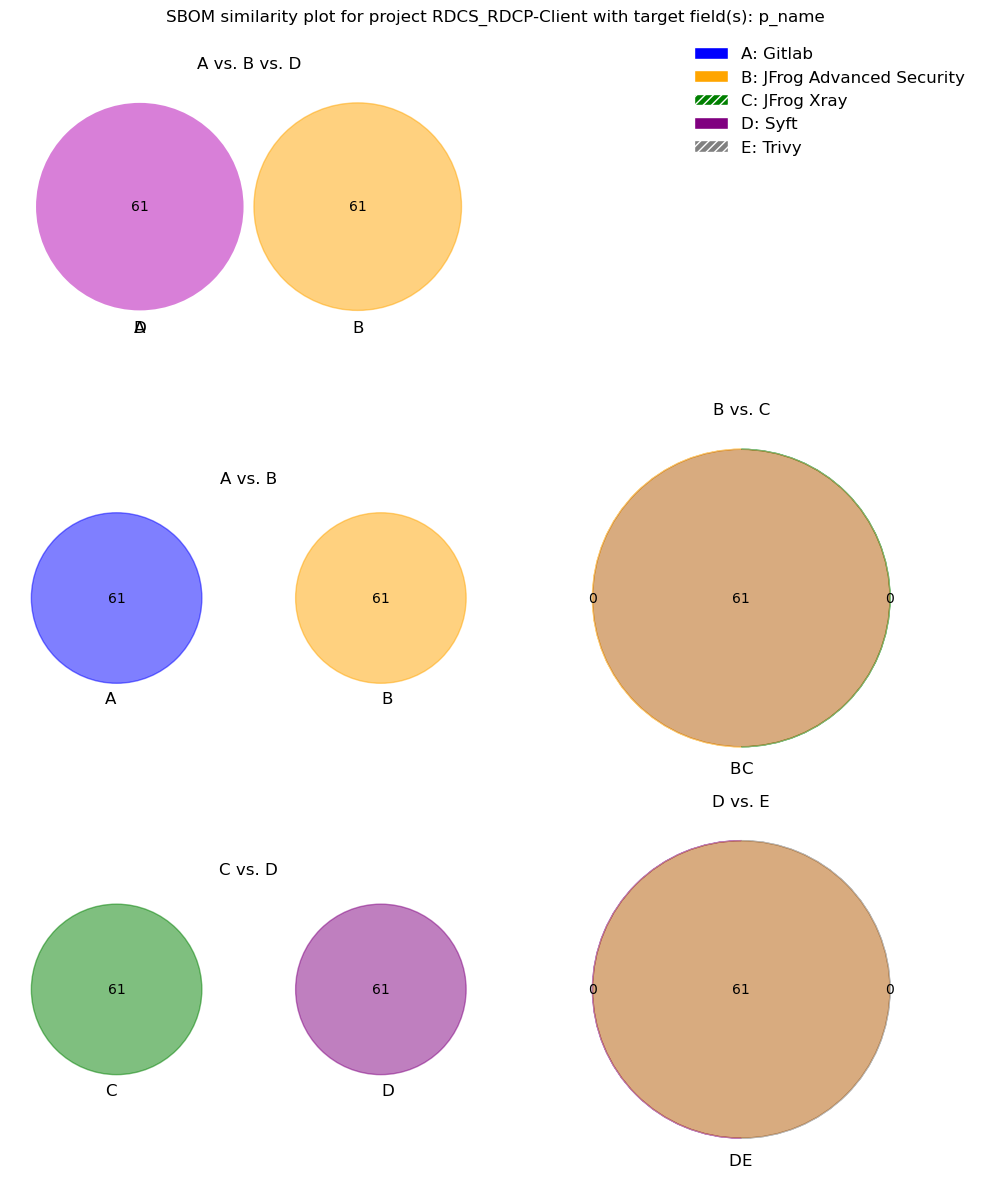

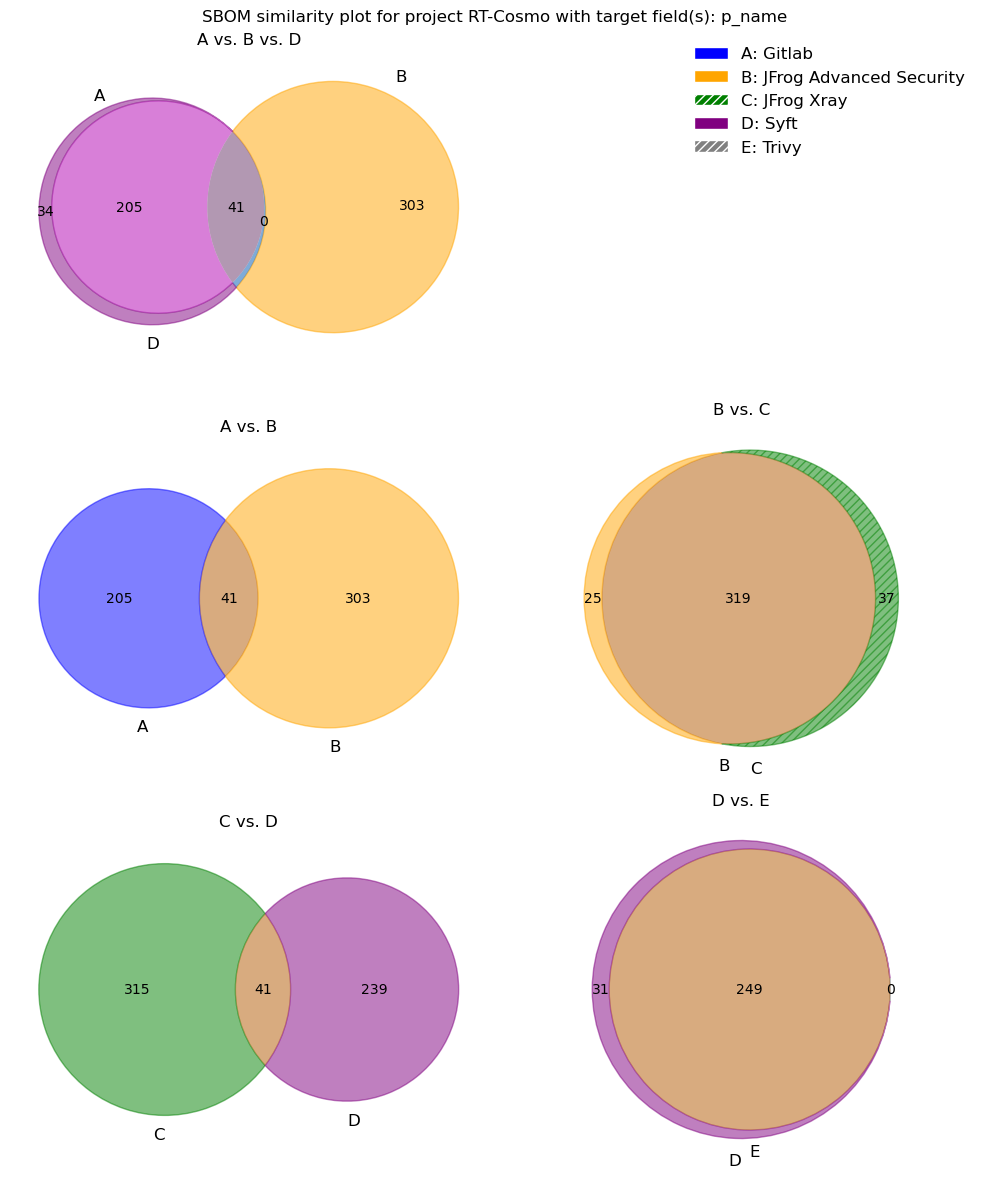

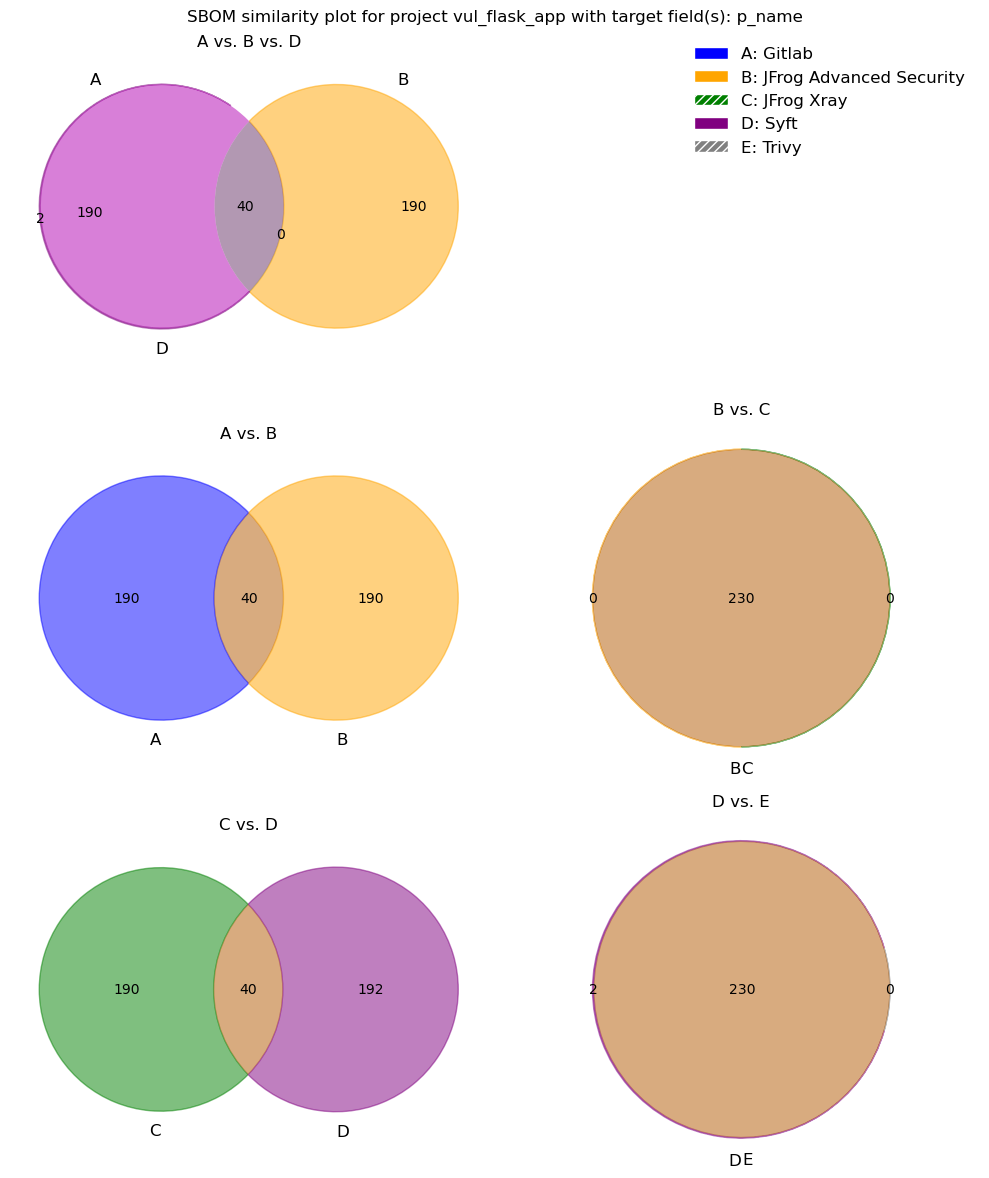

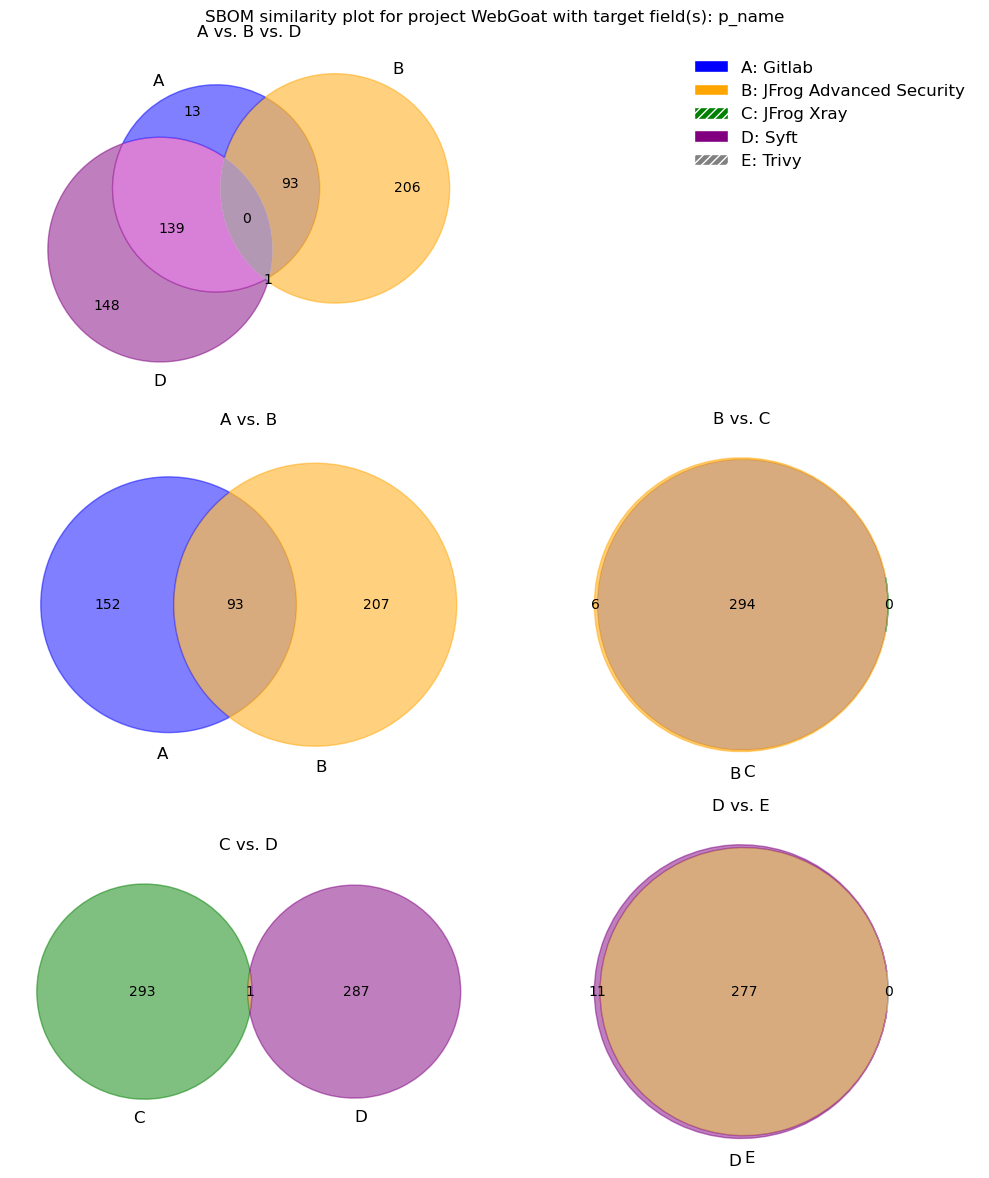

In [243]:
# define project name and target field 
project_name = in_scope[0]
target_fields = 'p_name'

for project_name in in_scope:
    # get project data in data frame
    project_scanner_data = collect_all_scanner_data_of_project(project_name)

    # visualize project scanner data
    target_output_file = f"SBOM_comparison_{project_name}_{target_fields}"
    create_SBOM_similarity_plot(project_name, target_fields, project_scanner_data, target_output_file)

# Workarea

## Analyse purl

In [34]:
from packageurl import PackageURL

In [41]:
test_purls = [
    'pkg:bitbucket/birkenfeld/pygments-main@244fd47e07d1014f0aed9c',
    'pkg:deb/debian/curl@7.50.3-1?arch=i386&distro=jessie',
    'pkg:docker/cassandra@sha256:244fd47e07d1004f0aed9c',
    'pkg:docker/customer/dockerimage@sha256:244fd47e07d1004f0aed9c?repository_url=gcr.io',
    'pkg:gem/jruby-launcher@1.1.2?platform=java',
    'pkg:gem/ruby-advisory-db-check@0.12.4',
    'pkg:github/package-url/purl-spec@244fd47e07d1004f0aed9c',
    'pkg:golang/google.golang.org/genproto#googleapis/api/annotations',
    'pkg:maven/org.apache.xmlgraphics/batik-anim@1.9.1?packaging=sources',
    'pkg:maven/org.apache.xmlgraphics/batik-anim@1.9.1?repository_url=repo.spring.io%2Frelease',
    'pkg:npm/%40angular/animation@12.3.1',
    'pkg:npm/foobar@12.3.1',
    'pkg:nuget/EnterpriseLibrary.Common@6.0.1304',
    'pkg:pypi/django@1.11.1',
    'pkg:rpm/fedora/curl@7.50.3-1.fc25?arch=i386&distro=fedora-25',
    'pkg:rpm/opensuse/curl@7.56.1-1.1.?arch=i386&distro=opensuse-tumbleweed',
    'fakestring'
]

for test_purl in test_purls:
    try:
        purl = PackageURL.from_string(test_purl)
        print(purl.to_dict())
        purl_dict = purl.to_dict()
    except Exception as e:
        print(f"Error processing PackageURL: {e}")
    

{'type': 'bitbucket', 'namespace': 'birkenfeld', 'name': 'pygments-main', 'version': '244fd47e07d1014f0aed9c', 'qualifiers': None, 'subpath': None}
{'type': 'deb', 'namespace': 'debian', 'name': 'curl', 'version': '7.50.3-1', 'qualifiers': {'arch': 'i386', 'distro': 'jessie'}, 'subpath': None}
{'type': 'docker', 'namespace': None, 'name': 'cassandra', 'version': 'sha256:244fd47e07d1004f0aed9c', 'qualifiers': None, 'subpath': None}
{'type': 'docker', 'namespace': 'customer', 'name': 'dockerimage', 'version': 'sha256:244fd47e07d1004f0aed9c', 'qualifiers': {'repository_url': 'gcr.io'}, 'subpath': None}
{'type': 'gem', 'namespace': None, 'name': 'jruby-launcher', 'version': '1.1.2', 'qualifiers': {'platform': 'java'}, 'subpath': None}
{'type': 'gem', 'namespace': None, 'name': 'ruby-advisory-db-check', 'version': '0.12.4', 'qualifiers': None, 'subpath': None}
{'type': 'github', 'namespace': 'package-url', 'name': 'purl-spec', 'version': '244fd47e07d1004f0aed9c', 'qualifiers': None, 'subpat

In [39]:
purl.to_dict().keys()

dict_keys(['type', 'namespace', 'name', 'version', 'qualifiers', 'subpath'])

In [37]:
purl.to_dict()

{'type': 'maven',
 'namespace': 'org.apache.commons',
 'name': 'io',
 'version': '1.3.4',
 'qualifiers': None,
 'subpath': None}

## Visualize the results

In [14]:
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

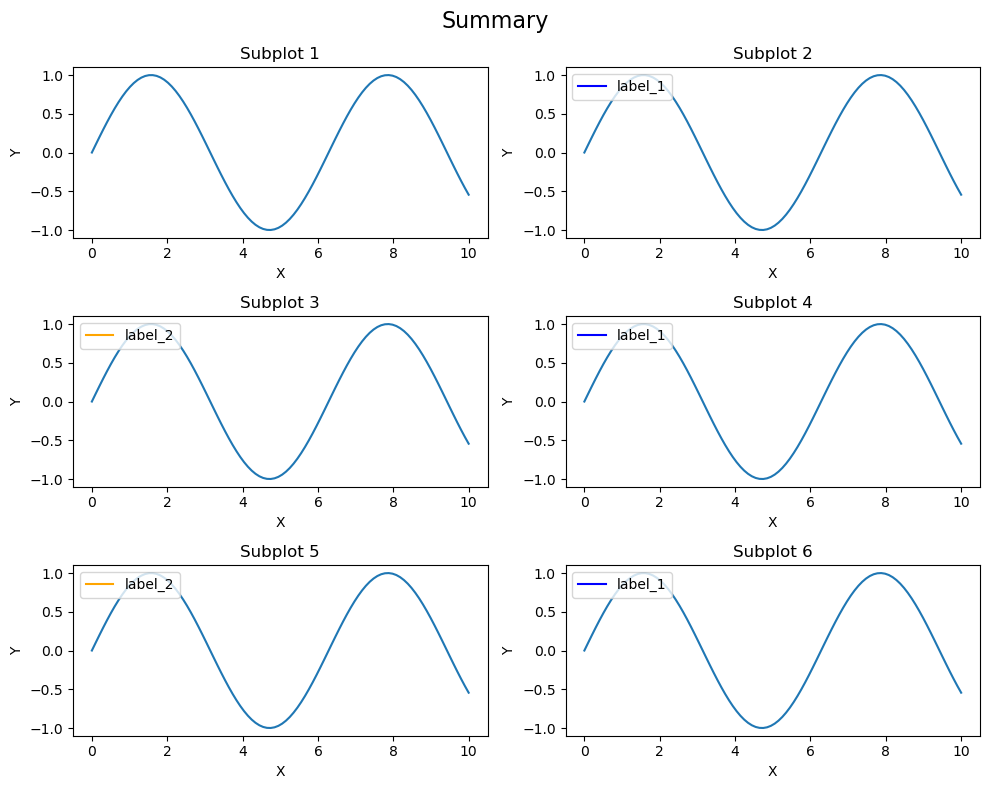

In [30]:

# Create a figure with 3x2 subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 8))

# Plot data on each subplot
for i, ax in enumerate(axs.flat):
    ax.plot(x, y, label=f'Subplot {i+1}')
    ax.set_title(f'Subplot {i+1}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    
    # Add legends only for the other five subplots
    if i != 0:
        ax.legend(loc='upper left', handles=[
            plt.Line2D([0], [0], color='blue' if i % 2 == 1 else 'orange', label='label_1' if i % 2 == 1 else 'label_2')
        ])

# Set a title for the entire subplot grid
fig.suptitle("Summary", fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


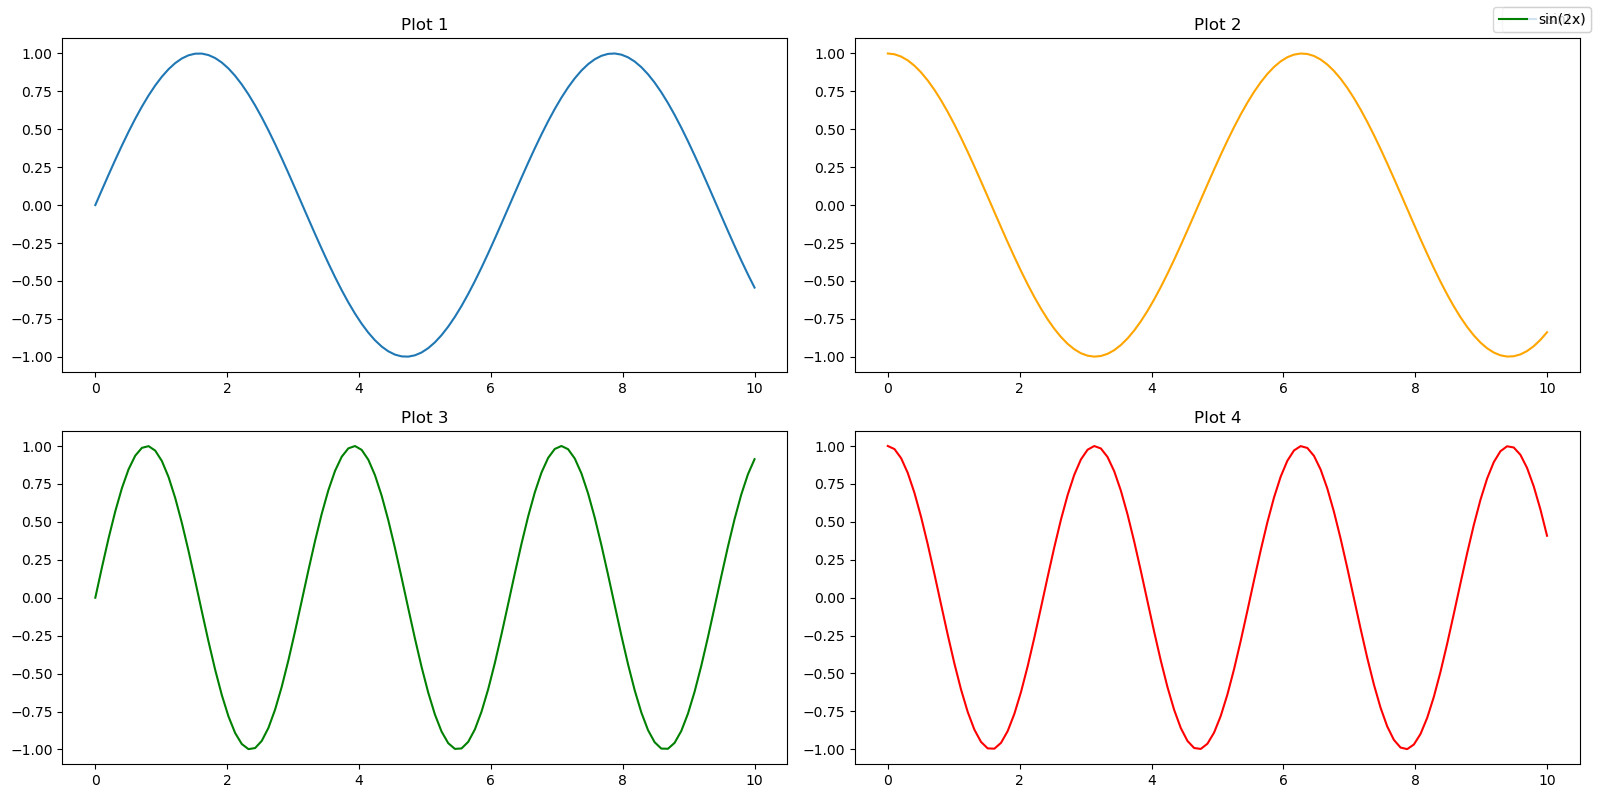

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Create some sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(2*x)
y4 = np.cos(2*x)

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

# Plot data on each subplot
axs[0, 0].plot(x, y1, label='sin(x)')
axs[0, 1].plot(x, y2, label='cos(x)', color='orange')
axs[1, 0].plot(x, y3, label='sin(2x)', color='green')
axs[1, 1].plot(x, y4, label='cos(2x)', color='red')

# Add a legend to the entire figure
lines, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(lines, labels, loc='upper right')
lines, labels = fig.axes[2].get_legend_handles_labels()
fig.legend(lines, labels, loc='upper right')

# Add titles to subplots
axs[0, 0].set_title('Plot 1')
axs[0, 1].set_title('Plot 2')
axs[1, 0].set_title('Plot 3')
axs[1, 1].set_title('Plot 4')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


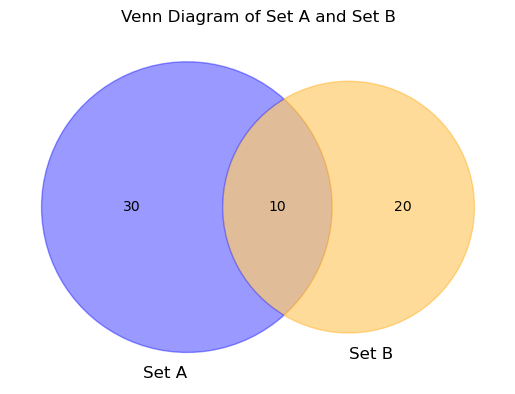

In [39]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Create the Venn diagram
venn = venn2(subsets=(30, 20, 10), set_labels=('Set A', 'Set B'))

# Customize colors
venn.get_patch_by_id('10').set_color('blue')
venn.get_patch_by_id('01').set_color('orange')

# Set the title
plt.title('Venn Diagram of Set A and Set B')

# Show the plot
plt.show()

In [28]:
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

# Define your sets
A = {"apple", "banana", "cherry", "date"}
B = {"banana", "cherry", "date", "elderberry"}
#C = {"cherry", "date", "elderberry", "fig"}
#D = {"date", "elderberry", "fig", "grape"}
#E = {"elderberry", "fig", "grape", "honeydew"}

#all_sets = [A, B, C, D, E]
all_sets = [A, B]
#set_names = ["A", "B"]

# Generate all possible combinations of sets
all_combinations = []
for r in range(2, len(all_sets) + 1):
    all_combinations.extend(itertools.combinations(all_sets, r))

# Initialize counts for different combinations
counts = {}
for combination in all_combinations:
    combined_set = set.intersection(*combination)
    set_indices = [set_names.index(s) for s in combination]
    counts[tuple(set_indices)] = len(combined_set)

# Visualize the results
x_labels = [" ".join([set_names[i] for i in indices]) for indices in counts.keys()]
y_values = list(counts.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=x_labels, y=y_values)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Set Combinations")
plt.ylabel("Number of Elements")
plt.title("Elements in Different Set Combinations")
plt.tight_layout()
plt.show()

ValueError: {'cherry', 'banana', 'date', 'apple'} is not in list

In [33]:
A = [1, 2, 3]
B = [2, 3, 4, 5]
combinations = list(itertools.product(A, B))
print(combinations)

[(1, 2), (1, 3), (1, 4), (1, 5), (2, 2), (2, 3), (2, 4), (2, 5), (3, 2), (3, 3), (3, 4), (3, 5)]
